<a href="https://colab.research.google.com/github/Laraguy/Mareas/blob/main/TP1_Mareas_Lara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import xarray as xr
from scipy.signal import find_peaks

# USHUAIA



In [ ]:
!wget https://raw.githubusercontent.com/lupalon/Mareas2022/main/ushu_ene_2017.nc
ushuaia =xr.open_dataset(r'ushu_ene_2017.nc') # *
ushuaia 

--2022-09-17 19:42:39--  https://raw.githubusercontent.com/lupalon/Mareas2022/main/ushu_ene_2017.nc
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23341 (23K) [application/octet-stream]
Saving to: ‘ushu_ene_2017.nc.3’

ushu_ene_2017.nc.3  100%[===================>]  22.79K  --.-KB/s    in 0.002s  

2022-09-17 19:42:39 (10.9 MB/s) - ‘ushu_ene_2017.nc.3’ saved [23341/23341]



<xarray.Dataset>
Dimensions:    (record_id: 1, time: 744)
Coordinates:
  * record_id  (record_id) int16 6001
  * time       (time) datetime64[ns] 2017-01-01 ... 2017-01-31T22:59:59.971200
Data variables:
    sea_level  (record_id, time) float32 ...
    lat        (record_id) float32 ...
    lon        (record_id) float32 ...
Attributes:
    title:                  JASL/UHSLC Research Quality Tide Gauge Data (hourly)
    ncei_template_version:  NCEI_NetCDF_TimeSeries_Orthogonal_Template_v2.0
    featureType:            timeSeries
    Conventions:            CF-1.6, ACDD-1.3
    date_created:           2020-06-09T10:50:30Z
    publisher_name:         University of Hawaii Sea Level Center (UHSLC)
    publisher_email:        philiprt@hawaii.edu, markm@soest.hawaii.edu
    publisher_url:          http://uhslc.soest.hawaii.edu
    summary:                The Joint Archive for Sea Level (JASL) Research Q...
    processing_level:       The JASL receives hourly data from regional and n...
    acknowledgment:         The JASL/UHSLC Research Quality Data Set is suppo...
    history:                2020-08-28 19:40:23 GMT Hyrax-Not.A.Release http:...

In [ ]:
ushuaia.sea_level #si quiero ver solo en nivel del mar

<xarray.DataArray 'sea_level' (record_id: 1, time: 744)>
array([[3468., 3303., 3159., ..., 3536., 3800., 3933.]], dtype=float32)
Coordinates:
  * record_id  (record_id) int16 6001
  * time       (time) datetime64[ns] 2017-01-01 ... 2017-01-31T22:59:59.971200
Attributes:
    long_name:  relative sea level
    units:      millimeters
    source:     in situ tide gauge water level observations
    platform:   station_name, station_country, station_country_code, uhslc_id...

In [ ]:
ushuaia.time #si quiero ver solo el tiempo

<xarray.DataArray 'time' (time: 744)>
array(['2017-01-01T00:00:00.000000000', '2017-01-01T01:00:00.028800000',
       '2017-01-01T01:59:59.971200000', ..., '2017-01-31T21:00:00.000000000',
       '2017-01-31T22:00:00.028800000', '2017-01-31T22:59:59.971200000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2017-01-01 ... 2017-01-31T22:59:59.971200
Attributes:
    long_name:  time
    axis:       T

In [ ]:
ushu=ushuaia.sea_level.to_dataframe()  # * lo paso a pandas
ushu.head()

sea_level
record_id time                                 
6001      2017-01-01 00:00:00.000000     3468.0
          2017-01-01 01:00:00.028800     3303.0
          2017-01-01 01:59:59.971200     3159.0
          2017-01-01 03:00:00.000000     3030.0
          2017-01-01 04:00:00.028800     2996.0

In [ ]:
ushu.set_index(ushuaia.time.values,inplace=True) #lo pongo de indice 
ushu.head() #no entiendo q cambia pero bueno * (teoria**)

sea_level
2017-01-01 00:00:00.000000     3468.0
2017-01-01 01:00:00.028800     3303.0
2017-01-01 01:59:59.971200     3159.0
2017-01-01 03:00:00.000000     3030.0
2017-01-01 04:00:00.028800     2996.0

In [ ]:
ushu.index=ushu.index.round('H') #no hay q entender todo 
ushu.head()

sea_level
2017-01-01 00:00:00     3468.0
2017-01-01 01:00:00     3303.0
2017-01-01 02:00:00     3159.0
2017-01-01 03:00:00     3030.0
2017-01-01 04:00:00     2996.0

Lo grafico

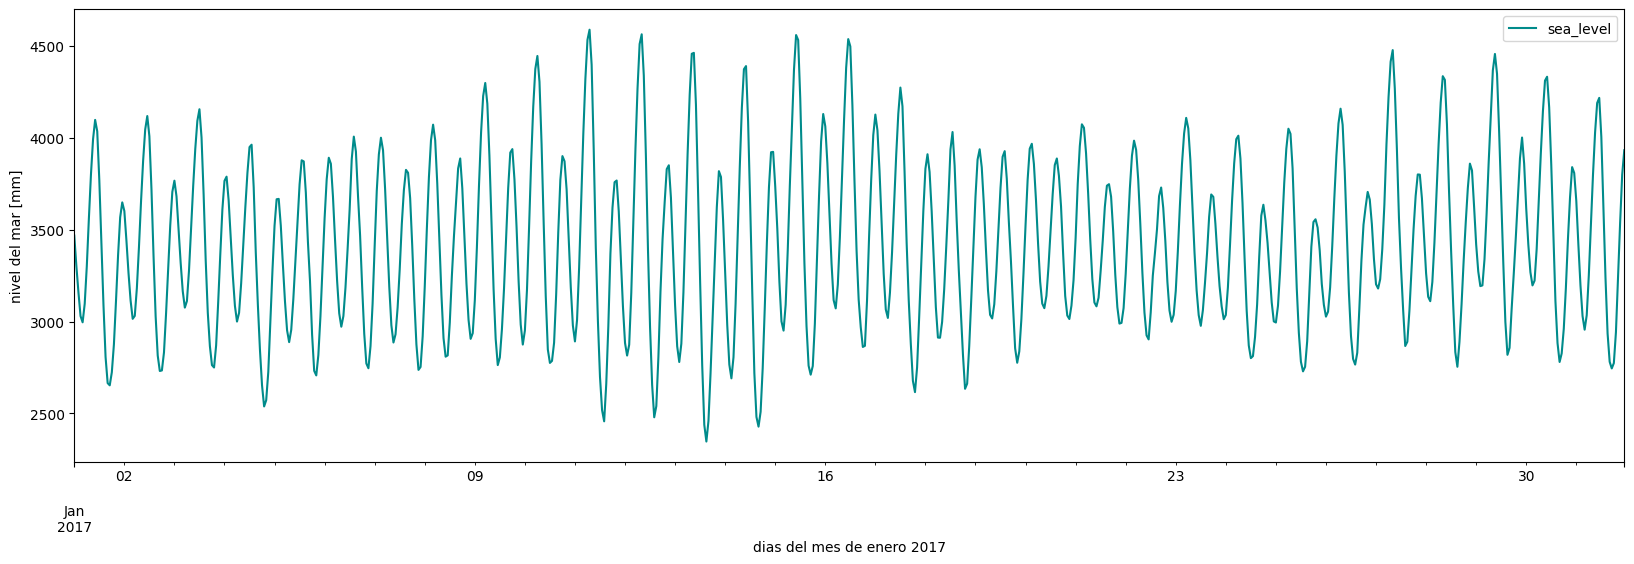

In [ ]:
plt.rc('figure', dpi=100)
ushu.plot(xlabel= "dias del mes de enero 2017", ylabel= "nivel del mar [mm]", figsize=(20,6), color="darkcyan")


In [ ]:
ushu.describe()

sea_level
count   744.000000
mean   3426.092773
std     463.185669
min    2347.000000
25%    3059.750000
50%    3407.500000
75%    3773.000000
max    4589.000000

In [ ]:
ushu.mean()

sea_level    3426.092773
dtype: float32

Ahora busco los picos chan

In [ ]:
ushu=ushuaia.sea_level.to_dataframe() 
ushu.set_index(ushuaia.time.values,inplace=True)
ushu.index=ushu.index.round('H')

Los picos=

In [ ]:
posicion=find_peaks(ushu.sea_level)[0] #--> Notar que la salida de la función findpeaks tiene 2 dimensiones 
#(en la primera tiene el índice de los picos y en la segunda las propiedades si es que se piden)
posicion

array([ 10,  23,  35,  48,  60,  73,  85,  98, 109, 122, 134, 147, 159,
       172, 185, 197, 210, 222, 234, 247, 260, 272, 285, 297, 309, 322,
       335, 346, 359, 371, 384, 396, 409, 421, 434, 446, 459, 471, 483,
       496, 508, 521, 533, 545, 558, 570, 582, 595, 607, 620, 632, 644,
       656, 669, 681, 694, 706, 718, 731])

Usando las posiciones de los picos, genero una variable nueva en donde me quedo con la fehca y el registro de nivel de ese momento

In [ ]:
altas=ushu.iloc[posicion]
altas

sea_level
2017-01-01 10:00:00     4098.0
2017-01-01 23:00:00     3649.0
2017-01-02 11:00:00     4119.0
2017-01-03 00:00:00     3767.0
2017-01-03 12:00:00     4156.0
2017-01-04 01:00:00     3789.0
2017-01-04 13:00:00     3963.0
2017-01-05 02:00:00     3668.0
2017-01-05 13:00:00     3878.0
2017-01-06 02:00:00     3892.0
2017-01-06 14:00:00     4007.0
2017-01-07 03:00:00     4001.0
2017-01-07 15:00:00     3826.0
2017-01-08 04:00:00     4072.0
2017-01-08 17:00:00     3888.0
2017-01-09 05:00:00     4299.0
2017-01-09 18:00:00     3939.0
2017-01-10 06:00:00     4446.0
2017-01-10 18:00:00     3901.0
2017-01-11 07:00:00     4589.0
2017-01-11 20:00:00     3768.0
2017-01-12 08:00:00     4564.0
2017-01-12 21:00:00     3851.0
2017-01-13 09:00:00     4463.0
2017-01-13 21:00:00     3819.0
2017-01-14 10:00:00     4391.0
2017-01-14 23:00:00     3924.0
2017-01-15 10:00:00     4560.0
2017-01-15 23:00:00     4130.0
2017-01-16 11:00:00     4538.0
2017-01-17 00:00:00     4127.0
2017-01-17 12:00:00     4274.0
2017-01-18 01:00:00     3911.0
2017-01-18 13:00:00     4032.0
2017-01-19 02:00:00     3938.0
2017-01-19 14:00:00     3928.0
2017-01-20 03:00:00     3968.0
2017-01-20 15:00:00     3888.0
2017-01-21 03:00:00     4074.0
2017-01-21 16:00:00     3748.0
2017-01-22 04:00:00     3985.0
2017-01-22 17:00:00     3730.0
2017-01-23 05:00:00     4109.0
2017-01-23 17:00:00     3692.0
2017-01-24 06:00:00     4012.0
2017-01-24 18:00:00     3636.0
2017-01-25 06:00:00     4050.0
2017-01-25 19:00:00     3557.0
2017-01-26 07:00:00     4159.0
2017-01-26 20:00:00     3706.0
2017-01-27 08:00:00     4478.0
2017-01-27 20:00:00     3801.0
2017-01-28 08:00:00     4336.0
2017-01-28 21:00:00     3860.0
2017-01-29 09:00:00     4457.0
2017-01-29 22:00:00     4002.0
2017-01-30 10:00:00     4333.0
2017-01-30 22:00:00     3841.0
2017-01-31 11:00:00     4218.0

Lo grafico

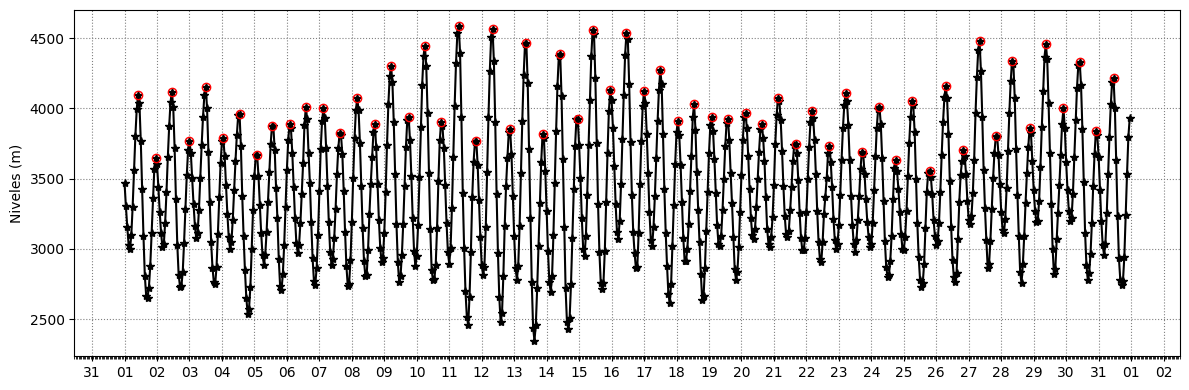

In [ ]:
fig, ax=plt.subplots(1,1,figsize=(12,4))
ax.plot(ushu,'k-*')
ax.plot(altas,'ro',fillstyle='none')
ax.set(ylabel="Niveles (m)")
ax.xaxis.set_minor_locator(mdates.HourLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax.grid(color='grey',linestyle=':')
plt.tight_layout()

Ahora busco los valles

In [ ]:
posicion_1=find_peaks(-ushu.sea_level)[0]
bajas=ushu.iloc[posicion_1]
bajas

sea_level
2017-01-01 04:00:00     2996.0
2017-01-01 17:00:00     2653.0
2017-01-02 04:00:00     3015.0
2017-01-02 17:00:00     2731.0
2017-01-03 05:00:00     3076.0
2017-01-03 19:00:00     2750.0
2017-01-04 06:00:00     3000.0
2017-01-04 19:00:00     2538.0
2017-01-05 07:00:00     2888.0
2017-01-05 20:00:00     2707.0
2017-01-06 08:00:00     2972.0
2017-01-06 21:00:00     2746.0
2017-01-07 09:00:00     2886.0
2017-01-07 21:00:00     2737.0
2017-01-08 10:00:00     2809.0
2017-01-08 22:00:00     2906.0
2017-01-09 11:00:00     2763.0
2017-01-09 23:00:00     2875.0
2017-01-10 12:00:00     2775.0
2017-01-11 00:00:00     2892.0
2017-01-11 14:00:00     2457.0
2017-01-12 01:00:00     2815.0
2017-01-12 14:00:00     2479.0
2017-01-13 02:00:00     2780.0
2017-01-13 15:00:00     2347.0
2017-01-14 03:00:00     2691.0
2017-01-14 16:00:00     2428.0
2017-01-15 04:00:00     2951.0
2017-01-15 17:00:00     2711.0
2017-01-16 05:00:00     3072.0
2017-01-16 18:00:00     2862.0
2017-01-17 06:00:00     3020.0
2017-01-17 19:00:00     2616.0
2017-01-18 07:00:00     2912.0
2017-01-18 19:00:00     2634.0
2017-01-19 08:00:00     3017.0
2017-01-19 20:00:00     2776.0
2017-01-20 09:00:00     3073.0
2017-01-20 21:00:00     3014.0
2017-01-21 10:00:00     3083.0
2017-01-21 21:00:00     2989.0
2017-01-22 11:00:00     2903.0
2017-01-22 22:00:00     2999.0
2017-01-23 12:00:00     2977.0
2017-01-23 23:00:00     3013.0
2017-01-24 12:00:00     2801.0
2017-01-25 00:00:00     2995.0
2017-01-25 13:00:00     2729.0
2017-01-26 00:00:00     3027.0
2017-01-26 14:00:00     2766.0
2017-01-27 01:00:00     3180.0
2017-01-27 14:00:00     2867.0
2017-01-28 02:00:00     3111.0
2017-01-28 15:00:00     2754.0
2017-01-29 02:00:00     3193.0
2017-01-29 15:00:00     2819.0
2017-01-30 03:00:00     3197.0
2017-01-30 16:00:00     2780.0
2017-01-31 04:00:00     2956.0
2017-01-31 17:00:00     2745.0

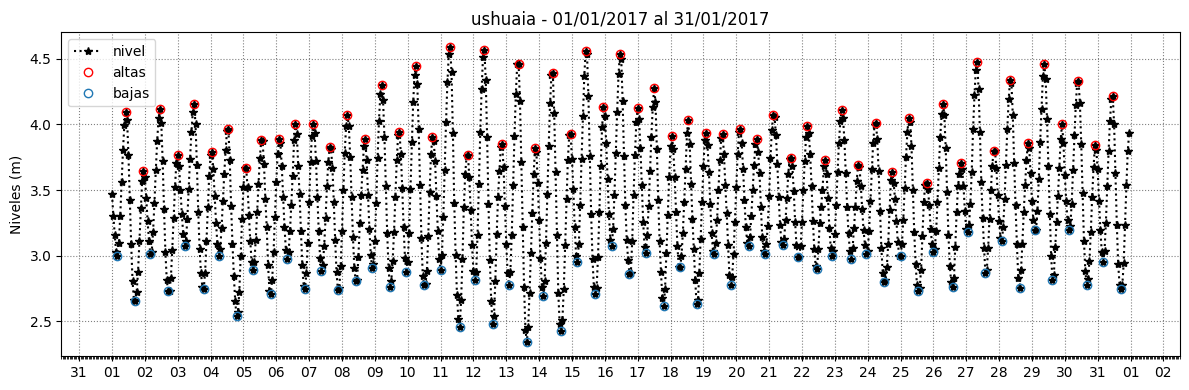

In [ ]:
fig, ax=plt.subplots(1,1,figsize=(12,4))
ax.plot(ushu/1000,'k:*')
ax.plot(altas/1000,'ro',fillstyle='none')
ax.plot(bajas/1000,'o',fillstyle='none')
ax.set(ylabel="Niveles (m)",title='ushuaia - 01/01/2017 al 31/01/2017')
ax.xaxis.set_minor_locator(mdates.HourLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax.grid(color='grey',linestyle=':')
ax.legend(['nivel','altas','bajas'])
plt.tight_layout()

Tengo los datos de cuando se produjo cada maximo y cada minimo con fecha y todo, con esto busco la amplitud

1ra opcion

In [ ]:
ampli_1=pd.DataFrame(altas.values-bajas.iloc[1::].values)
ampli_1= ampli_1/1000

In [ ]:
ampli_1

0
0   1.445
1   0.634
2   1.388
3   0.691
4   1.406
5   0.789
6   1.425
7   0.780
8   1.171
9   0.920
10  1.261
11  1.115
12  1.089
13  1.263
14  0.982
15  1.536
16  1.064
17  1.671
18  1.009
19  2.132
20  0.953
21  2.085
22  1.071
23  2.116
24  1.128
25  1.963
26  0.973
27  1.849
28  1.058
29  1.676
30  1.107
31  1.658
32  0.999
33  1.398
34  0.921
35  1.152
36  0.895
37  0.874
38  0.991
39  0.759
40  1.082
41  0.731
42  1.132
43  0.679
44  1.211
45  0.641
46  1.321
47  0.530
48  1.393
49  0.526
50  1.611
51  0.690
52  1.582
53  0.667
54  1.638
55  0.805
56  1.553
57  0.885
58  1.473

In [ ]:
ampli_1.describe()

0
count  59.000000
mean    1.178763
std     0.406927
min     0.526000
25%     0.890000
50%     1.107000
75%     1.435000
max     2.132000

2da opcion, quizas para algunos datos una sirva mas que otra, siempre puedo hacer un histograma para chequear la dispersion de valores q tomas. 
en el de ushuaia sirve mas la 1ra

Busco estimar el periodo de las ondas a traves d la dif temporal entre picos

In [ ]:
periodos=np.diff(posicion)
periodos

array([13, 12, 13, 12, 13, 12, 13, 11, 13, 12, 13, 12, 13, 13, 12, 13, 12,
       12, 13, 13, 12, 13, 12, 12, 13, 13, 11, 13, 12, 13, 12, 13, 12, 13,
       12, 13, 12, 12, 13, 12, 13, 12, 12, 13, 12, 12, 13, 12, 13, 12, 12,
       12, 13, 12, 13, 12, 12, 13])

In [ ]:
periodos.std()

0.5605437312761675

(array([ 2.,  0.,  0.,  0.,  0., 29.,  0.,  0.,  0., 27.]),
 array([11. , 11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. ]),
 <a list of 10 Patch objects>)

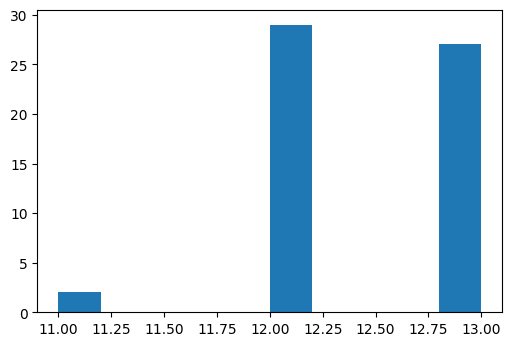

In [ ]:
plt.hist(periodos)

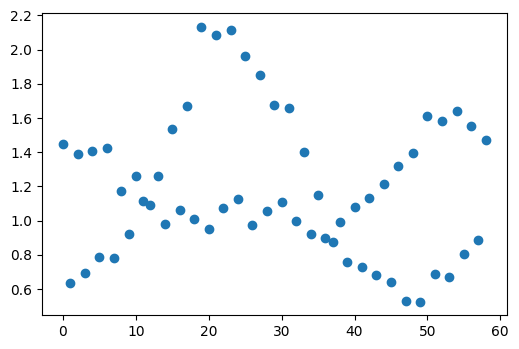

In [ ]:
plt.plot(ampli_1, "o")
plt.show()

In [ ]:
ampli_1.describe()

0
count  59.000000
mean    1.178763
std     0.406927
min     0.526000
25%     0.890000
50%     1.107000
75%     1.435000
max     2.132000

In [ ]:
periodos

array([13, 12, 13, 12, 13, 12, 13, 11, 13, 12, 13, 12, 13, 13, 12, 13, 12,
       12, 13, 13, 12, 13, 12, 12, 13, 13, 11, 13, 12, 13, 12, 13, 12, 13,
       12, 13, 12, 12, 13, 12, 13, 12, 12, 13, 12, 12, 13, 12, 13, 12, 12,
       12, 13, 12, 13, 12, 12, 13])

In [ ]:
ushu.iloc[periodos] #Ojo porque periodos no indica posición en ushuaia

sea_level
2017-01-01 13:00:00     3428.0
2017-01-01 12:00:00     3770.0
2017-01-01 13:00:00     3428.0
2017-01-01 12:00:00     3770.0
2017-01-01 13:00:00     3428.0
2017-01-01 12:00:00     3770.0
2017-01-01 13:00:00     3428.0
2017-01-01 11:00:00     4036.0
2017-01-01 13:00:00     3428.0
2017-01-01 12:00:00     3770.0
2017-01-01 13:00:00     3428.0
2017-01-01 12:00:00     3770.0
2017-01-01 13:00:00     3428.0
2017-01-01 13:00:00     3428.0
2017-01-01 12:00:00     3770.0
2017-01-01 13:00:00     3428.0
2017-01-01 12:00:00     3770.0
2017-01-01 12:00:00     3770.0
2017-01-01 13:00:00     3428.0
2017-01-01 13:00:00     3428.0
2017-01-01 12:00:00     3770.0
2017-01-01 13:00:00     3428.0
2017-01-01 12:00:00     3770.0
2017-01-01 12:00:00     3770.0
2017-01-01 13:00:00     3428.0
2017-01-01 13:00:00     3428.0
2017-01-01 11:00:00     4036.0
2017-01-01 13:00:00     3428.0
2017-01-01 12:00:00     3770.0
2017-01-01 13:00:00     3428.0
2017-01-01 12:00:00     3770.0
2017-01-01 13:00:00     3428.0
2017-01-01 12:00:00     3770.0
2017-01-01 13:00:00     3428.0
2017-01-01 12:00:00     3770.0
2017-01-01 13:00:00     3428.0
2017-01-01 12:00:00     3770.0
2017-01-01 12:00:00     3770.0
2017-01-01 13:00:00     3428.0
2017-01-01 12:00:00     3770.0
2017-01-01 13:00:00     3428.0
2017-01-01 12:00:00     3770.0
2017-01-01 12:00:00     3770.0
2017-01-01 13:00:00     3428.0
2017-01-01 12:00:00     3770.0
2017-01-01 12:00:00     3770.0
2017-01-01 13:00:00     3428.0
2017-01-01 12:00:00     3770.0
2017-01-01 13:00:00     3428.0
2017-01-01 12:00:00     3770.0
2017-01-01 12:00:00     3770.0
2017-01-01 12:00:00     3770.0
2017-01-01 13:00:00     3428.0
2017-01-01 12:00:00     3770.0
2017-01-01 13:00:00     3428.0
2017-01-01 12:00:00     3770.0
2017-01-01 12:00:00     3770.0
2017-01-01 13:00:00     3428.0

Paso info a un array

In [ ]:
x_ushu=np.squeeze(ushu.values-ushu.mean().values)
x_ushu=x_ushu/1000
np.info(x_ushu)

class:  ndarray
shape:  (744,)
strides:  (4,)
itemsize:  4
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0xb672400
byteorder:  little
byteswap:  False
type: float32


Defino el espacio de frecuencias
frecuencia de muestreo fs
frecuencia de nysquist fn
ff: frecuencia minima visble

todo se divide por 60 asi los datos aparecen en horas

In [ ]:
fs_ushu=1/(60*60)
dur_ushu=ushu.size*60*60
ff_ushu=1/(dur_ushu-1)
fN_ushu=1/(2*60*60)
f_ushu=np.arange(0,fN_ushu,ff_ushu)

Todo eso mas facil aca

In [ ]:
freq_ushu=np.fft.fftfreq(x_ushu.size,d=60*60)
freq_ushu

array([ 0.00000000e+00,  3.73357228e-07,  7.46714456e-07,  1.12007168e-06,
        1.49342891e-06,  1.86678614e-06,  2.24014337e-06,  2.61350060e-06,
        2.98685783e-06,  3.36021505e-06,  3.73357228e-06,  4.10692951e-06,
        4.48028674e-06,  4.85364397e-06,  5.22700119e-06,  5.60035842e-06,
        5.97371565e-06,  6.34707288e-06,  6.72043011e-06,  7.09378734e-06,
        7.46714456e-06,  7.84050179e-06,  8.21385902e-06,  8.58721625e-06,
        8.96057348e-06,  9.33393070e-06,  9.70728793e-06,  1.00806452e-05,
        1.04540024e-05,  1.08273596e-05,  1.12007168e-05,  1.15740741e-05,
        1.19474313e-05,  1.23207885e-05,  1.26941458e-05,  1.30675030e-05,
        1.34408602e-05,  1.38142174e-05,  1.41875747e-05,  1.45609319e-05,
        1.49342891e-05,  1.53076464e-05,  1.56810036e-05,  1.60543608e-05,
        1.64277180e-05,  1.68010753e-05,  1.71744325e-05,  1.75477897e-05,
        1.79211470e-05,  1.82945042e-05,  1.86678614e-05,  1.90412186e-05,
        1.94145759e-05,  

Transformada de fourier

In [ ]:
Y_ushu=np.fft.fft(x_ushu)

In [ ]:
xff_ushu=(1/len(Y_ushu))*np.abs(Y_ushu)#Y_ushu.real

In [ ]:
freq_ushu.size

744

In [ ]:
xff_ushu.size

744

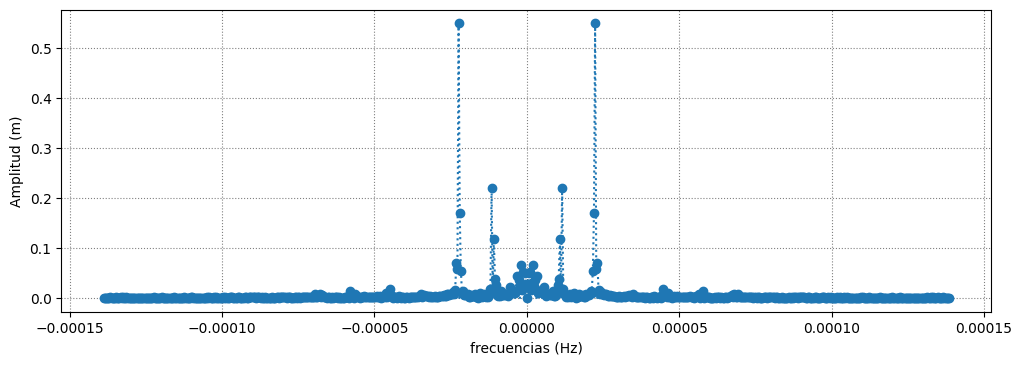

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(freq_ushu,xff_ushu*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='frecuencias (Hz)')
axs.grid(color='grey',ls=':',which='both')

In [ ]:
xff_ushu

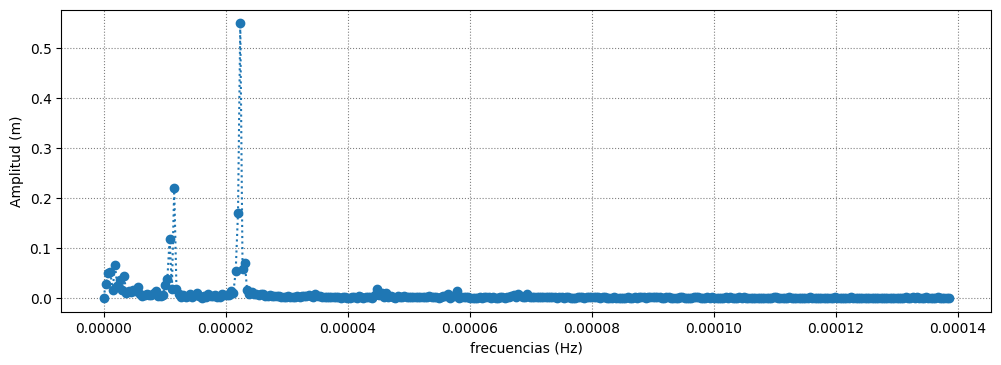

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(freq_ushu[freq_ushu>=0],xff_ushu[freq_ushu>=0]*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='frecuencias (Hz)')
axs.grid(color='grey',ls=':',which='both')

In [ ]:
per_ushu=(1/freq_ushu[1::])/3600

In [ ]:
per_ushu=np.append(per_ushu,0)

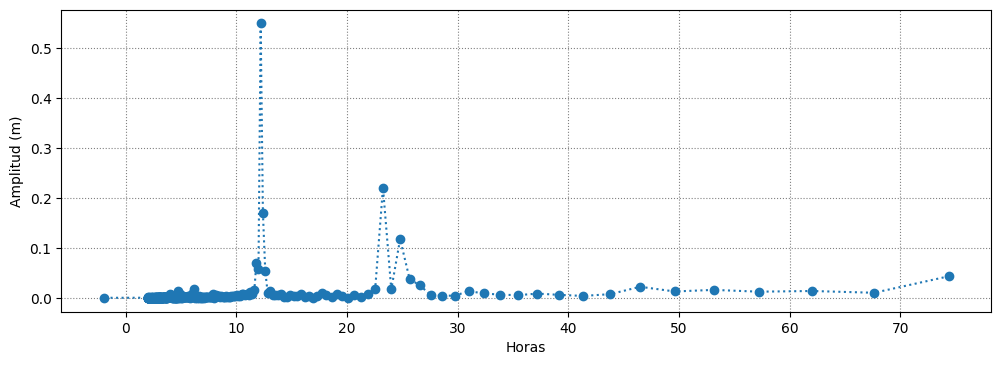

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(per_ushu[9:372],xff_ushu[9:372]*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='Horas')
axs.grid(color='grey',ls=':',which='both')

In [ ]:
per_ushu[14:372]

array([49.6       , 46.5       , 43.76470588, 41.33333333, 39.15789474,
       37.2       , 35.42857143, 33.81818182, 32.34782609, 31.        ,
       29.76      , 28.61538462, 27.55555556, 26.57142857, 25.65517241,
       24.8       , 24.        , 23.25      , 22.54545455, 21.88235294,
       21.25714286, 20.66666667, 20.10810811, 19.57894737, 19.07692308,
       18.6       , 18.14634146, 17.71428571, 17.30232558, 16.90909091,
       16.53333333, 16.17391304, 15.82978723, 15.5       , 15.18367347,
       14.88      , 14.58823529, 14.30769231, 14.03773585, 13.77777778,
       13.52727273, 13.28571429, 13.05263158, 12.82758621, 12.61016949,
       12.4       , 12.19672131, 12.        , 11.80952381, 11.625     ,
       11.44615385, 11.27272727, 11.10447761, 10.94117647, 10.7826087 ,
       10.62857143, 10.47887324, 10.33333333, 10.19178082, 10.05405405,
        9.92      ,  9.78947368,  9.66233766,  9.53846154,  9.41772152,
        9.3       ,  9.18518519,  9.07317073,  8.96385542,  8.85

In [ ]:
resul_ushu=pd.DataFrame(columns=['f','T','A','fase'])

In [ ]:
resul_ushu['f']=freq_ushu[freq_ushu>=0]
resul_ushu['T']=(1/freq_ushu[freq_ushu>=0])/3600
resul_ushu['A']=xff_ushu[freq_ushu>=0]*2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [ ]:
ordenados=resul_ushu.sort_values(by=['A'],ascending=False)

In [ ]:
ordenados['A']=ordenados['A'].round(3)

In [ ]:
171/24

In [ ]:
ordenados[0:10]

f           T      A fase
60  2.240143e-05   12.400000  0.550  NaN
31  1.157407e-05   24.000000  0.221  NaN
59  2.202808e-05   12.610169  0.171  NaN
29  1.082736e-05   25.655172  0.118  NaN
62  2.314815e-05   12.000000  0.070  NaN
5   1.866786e-06  148.800000  0.066  NaN
61  2.277479e-05   12.196721  0.058  NaN
58  2.165472e-05   12.827586  0.055  NaN
3   1.120072e-06  248.000000  0.051  NaN
2   7.467145e-07  372.000000  0.051  NaN

# Mar del plata

In [ ]:
!wget https://raw.githubusercontent.com/lupalon/Mareas2022/main/MdP_may12_ene13.csv
mdp=pd.read_csv(r'/content/MdP_may12_ene13.csv',delim_whitespace=True,names=['Niveles'])
mdp

--2022-12-01 19:03:17--  https://raw.githubusercontent.com/lupalon/Mareas2022/main/MdP_may12_ene13.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 494899 (483K) [text/plain]
Saving to: ‘MdP_may12_ene13.csv’

MdP_may12_ene13.csv 100%[===================>] 483.30K  --.-KB/s    in 0.04s   

2022-12-01 19:03:18 (12.6 MB/s) - ‘MdP_may12_ene13.csv’ saved [494899/494899]



Niveles
0        0.647
1        0.647
2        0.646
3        0.653
4        0.662
...        ...
61810    1.767
61811    1.785
61812    1.789
61813    1.770
61814    1.731

[61815 rows x 1 columns]

Indice con fechas no con numeros

In [ ]:
fechmdp=pd.date_range('2012-05-31 11:50:00',periods=len(mdp),freq='5 min')
mdp.set_index(fechmdp,inplace=True)
mdp.head()

Niveles
2012-05-31 11:50:00    0.647
2012-05-31 11:55:00    0.647
2012-05-31 12:00:00    0.646
2012-05-31 12:05:00    0.653
2012-05-31 12:10:00    0.662

In [ ]:
#mdp.index=mdp.index.round('H')

Grafico

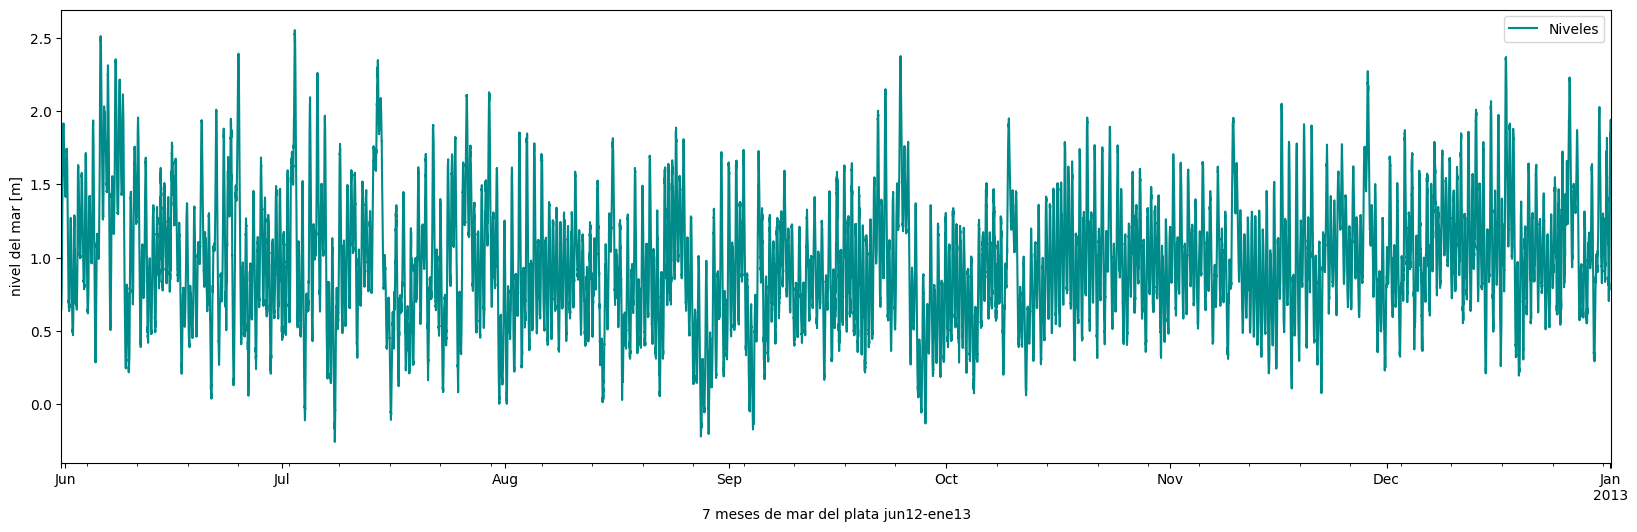

In [ ]:
plt.rc('figure', dpi=100)
mdp.plot(xlabel= "7 meses de mar del plata jun12-ene13", ylabel= "nivel del mar [m]", figsize=(20,6), color="darkcyan")

In [ ]:
mdp.describe()

Niveles
count  61815.000000
mean       0.975499
std        0.432521
min       -0.257000
25%        0.669000
50%        0.943000
75%        1.251000
max        2.552000

los picos

In [ ]:
from scipy.signal import find_peaks #Cargo la función
posicion=find_peaks(mdp.Niveles)[0] #--> Notar que la salida de la función findpeaks tiene 2 dimensiones 
#(en la primera tiene el índice de los picos y en la segunda las propiedades si es que se piden)
posicion

array([   70,    75,    83, ..., 61798, 61803, 61812])

Usando las posiciones de los picos, genero una variable nueva en donde me quedo con la fehca y el registro de nivel de ese momento

In [ ]:
altas=mdp.iloc[posicion]

In [ ]:
altas.size

5365

In [ ]:
posicion_1=find_peaks(-mdp.Niveles)[0]
bajas=mdp.iloc[posicion_1]
bajas

Niveles
2012-05-31 12:00:00    0.646
2012-05-31 17:50:00    1.855
2012-05-31 18:10:00    1.885
2012-05-31 18:55:00    1.902
2012-05-31 19:15:00    1.906
...                      ...
2013-01-01 00:15:00    1.789
2013-01-01 00:30:00    1.785
2013-01-01 01:35:00    1.840
2013-01-01 01:50:00    1.817
2013-01-01 02:25:00    1.742

[5365 rows x 1 columns]

In [ ]:
bajas.size

5365

In [ ]:
ampli_1=pd.DataFrame(altas.values-bajas.values)
ampli_1= ampli_1

In [ ]:
periodos=np.diff(posicion)
np.round(periodos*5/60,2)

array([0.42, 0.67, 0.33, ..., 0.5 , 0.42, 0.75])

In [ ]:
periodos= np.round(periodos*5/60,2)

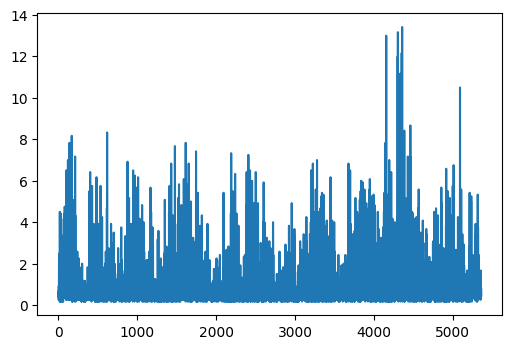

In [ ]:
plt.plot(periodos)

Paso info a un array

In [ ]:
x_mdp=np.squeeze(mdp-mdp.mean())
np.info(x_mdp)

One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object
supports both integer- and label-based indexing and provides a host of
methods for performing operations involving the index. Statistical
methods from ndarray have been overridden to automatically exclude
missing data (currently represented as NaN).

Operations between Series (+, -, /, *, **) align values based on their
associated index values-- they need not be the same length. The result
index will be the sorted union of the two indexes.

Parameters
----------
data : array-like, Iterable, dict, or scalar value
    Contains data stored in Series. If data is a dict, argument order is
    maintained.
index : array-like or Index (1d)
    Values must be hashable and have the same length as `data`.
    Non-unique index values are allowed. Will default to
    RangeIndex (0, 1, 2, ..., n) if not provided. If data is dict-like
    and index is None, then the key

Defino el espacio de frecuencias
frecuencia de muestreo fs
frecuencia de nysquist fn
ff: frecuencia minima visble

todo se divide por 60 asi los datos aparecen en horas

Todo eso mas facil aca

In [ ]:
freq_mdp=np.fft.fftfreq(x_mdp.size,d=5*60)
freq_mdp

array([ 0.00000000e+00,  5.39243441e-08,  1.07848688e-07, ...,
       -1.61773032e-07, -1.07848688e-07, -5.39243441e-08])

Transformada de fourier

In [ ]:
Y_mdp=np.fft.fft(x_mdp)

In [ ]:
xff_mdp=(1/len(Y_mdp))*np.abs(Y_mdp)#Y_mdp.real

In [ ]:
freq_mdp.size

61815

In [ ]:
xff_mdp.size

61815

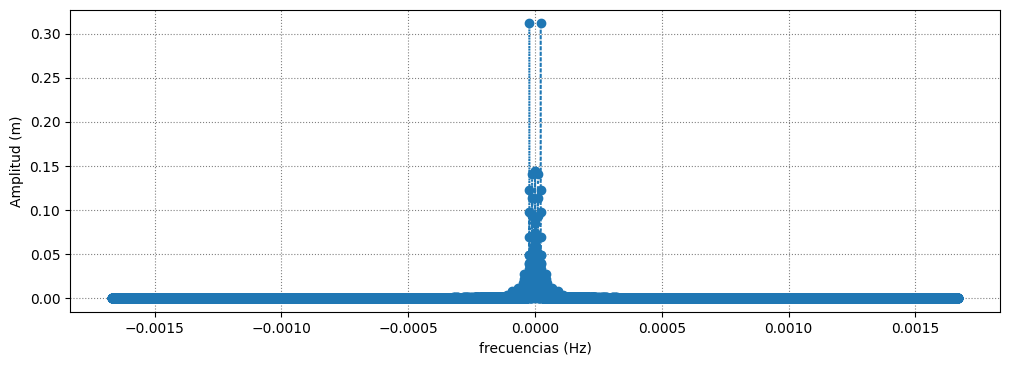

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(freq_mdp,xff_mdp*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='frecuencias (Hz)')
axs.grid(color='grey',ls=':',which='both')

In [ ]:
xff_mdp

array([1.67391931e-17, 7.19162237e-02, 9.11973865e-03, ...,
       1.41809546e-02, 9.11973865e-03, 7.19162237e-02])

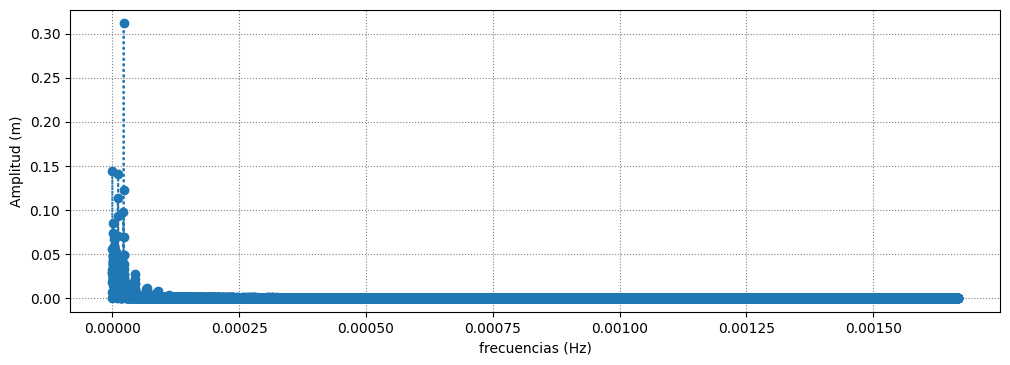

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(freq_mdp[freq_mdp>=0],xff_mdp[freq_mdp>=0]*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='frecuencias (Hz)')
axs.grid(color='grey',ls=':',which='both')

In [ ]:
per_mdp=(1/freq_mdp[1::])/3600

In [ ]:
xff_mdp.size

61815

In [ ]:
per_mdp=np.append(per_mdp,0)
per_mdp

array([ 5151.25      ,  2575.625     ,  1717.08333333, ...,
       -2575.625     , -5151.25      ,     0.        ])

In [ ]:
per_mdp.size

61815

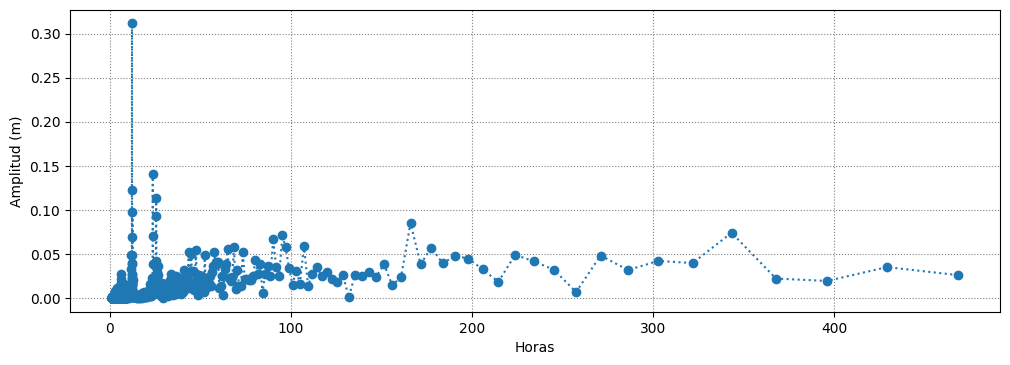

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(per_mdp[10:3408],xff_mdp[10:3408]*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='Horas')
axs.grid(color='grey',ls=':',which='both')

In [ ]:
per_mdp[3300:3408]

array([1.56051197, 1.56003937, 1.55956706, 1.55909504, 1.5586233 ,
       1.55815185, 1.55768068, 1.55720979, 1.5567392 , 1.55626888,
       1.55579885, 1.55532911, 1.55485964, 1.55439046, 1.55392157,
       1.55345296, 1.55298462, 1.55251658, 1.55204881, 1.55158133,
       1.55111412, 1.5506472 , 1.55018056, 1.5497142 , 1.54924812,
       1.54878232, 1.5483168 , 1.54785156, 1.5473866 , 1.54692192,
       1.54645752, 1.5459934 , 1.54552955, 1.54506599, 1.5446027 ,
       1.54413969, 1.54367696, 1.5432145 , 1.54275232, 1.54229042,
       1.54182879, 1.54136744, 1.54090637, 1.54044557, 1.53998505,
       1.53952481, 1.53906483, 1.53860514, 1.53814572, 1.53768657,
       1.53722769, 1.53676909, 1.53631077, 1.53585271, 1.53539493,
       1.53493743, 1.53448019, 1.53402323, 1.53356654, 1.53311012,
       1.53265397, 1.5321981 , 1.53174249, 1.53128716, 1.5308321 ,
       1.5303773 , 1.52992278, 1.52946853, 1.52901454, 1.52856083,
       1.52810739, 1.52765421, 1.5272013 , 1.52674867, 1.52629

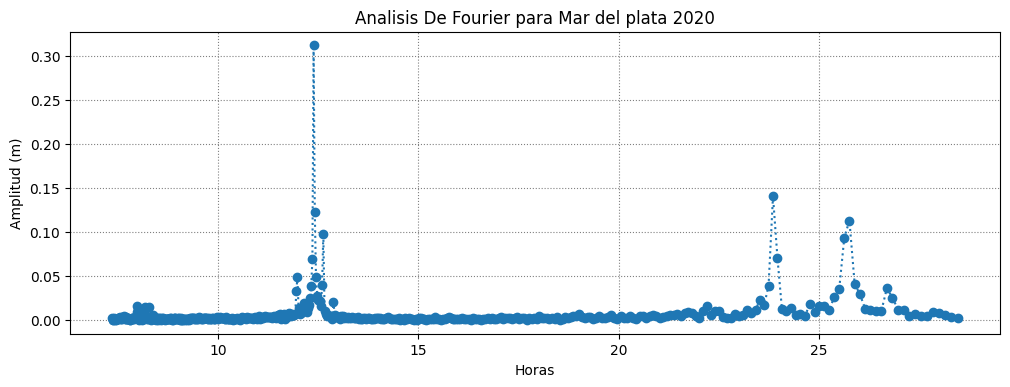

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(per_mdp[180:700],xff_mdp[180:700]*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='Horas', title='Analisis De Fourier para Mar del plata 2020')
axs.grid(color='grey',ls=':',which='both')

Hacemos un zoom menor a 10 hs

In [ ]:
per_mdp[5:100]

array([858.54166667, 735.89285714, 643.90625   , 572.36111111,
       515.125     , 468.29545455, 429.27083333, 396.25      ,
       367.94642857, 343.41666667, 321.953125  , 303.01470588,
       286.18055556, 271.11842105, 257.5625    , 245.29761905,
       234.14772727, 223.9673913 , 214.63541667, 206.05      ,
       198.125     , 190.78703704, 183.97321429, 177.62931034,
       171.70833333, 166.16935484, 160.9765625 , 156.09848485,
       151.50735294, 147.17857143, 143.09027778, 139.22297297,
       135.55921053, 132.08333333, 128.78125   , 125.6402439 ,
       122.64880952, 119.79651163, 117.07386364, 114.47222222,
       111.98369565, 109.60106383, 107.31770833, 105.12755102,
       103.025     , 101.00490196,  99.0625    ,  97.19339623,
        95.39351852,  93.65909091,  91.98660714,  90.37280702,
        88.81465517,  87.30932203,  85.85416667,  84.44672131,
        83.08467742,  81.76587302,  80.48828125,  79.25      ,
        78.04924242,  76.88432836,  75.75367647,  74.65

Zoom de mas de 10 horas

In [ ]:
resul_mdp=pd.DataFrame(columns=['T','A'])

In [ ]:

resul_mdp['T']=(1/freq_mdp[freq_mdp>=0])/3600
resul_mdp['A']=xff_mdp[freq_mdp>=0]*2

<ipython-input-34-0c643bc478a8>:1: RuntimeWarning: divide by zero encountered in true_divide
  resul_mdp['T']=(1/freq_mdp[freq_mdp>=0])/3600


In [ ]:
ordenados=resul_mdp.sort_values(by=['A'],ascending=False)

In [ ]:
ordenados['A']=ordenados['A'].round(3)

In [ ]:
171/24

7.125

In [ ]:
ordenados[0:20]

T      A
415    12.412651  0.311
1    5151.250000  0.144
215    23.959302  0.141
414    12.442633  0.122
199    25.885678  0.113
407    12.656634  0.098
200    25.756250  0.094
30    171.708333  0.085
14    367.946429  0.074
53     97.193396  0.071
214    24.071262  0.071
416    12.382812  0.069
56     91.986607  0.067
47    109.601064  0.059
74     69.611486  0.058
52     99.062500  0.057
28    183.973214  0.057
78     66.041667  0.056
6     858.541667  0.055
107    48.142523  0.054

# Muchos datos, extraigo un mes de interes

In [ ]:
mdp_1m = mdp.Niveles["2012-06-15 11:50:00":"2012-07-15 11:50:00"]
mdp_1m

2012-06-15 11:50:00    0.891
2012-06-15 11:55:00    0.869
2012-06-15 12:00:00    0.859
2012-06-15 12:05:00    0.836
2012-06-15 12:10:00    0.817
                       ...  
2012-07-15 11:30:00    0.580
2012-07-15 11:35:00    0.568
2012-07-15 11:40:00    0.553
2012-07-15 11:45:00    0.534
2012-07-15 11:50:00    0.520
Freq: 5T, Name: Niveles, Length: 8641, dtype: float64

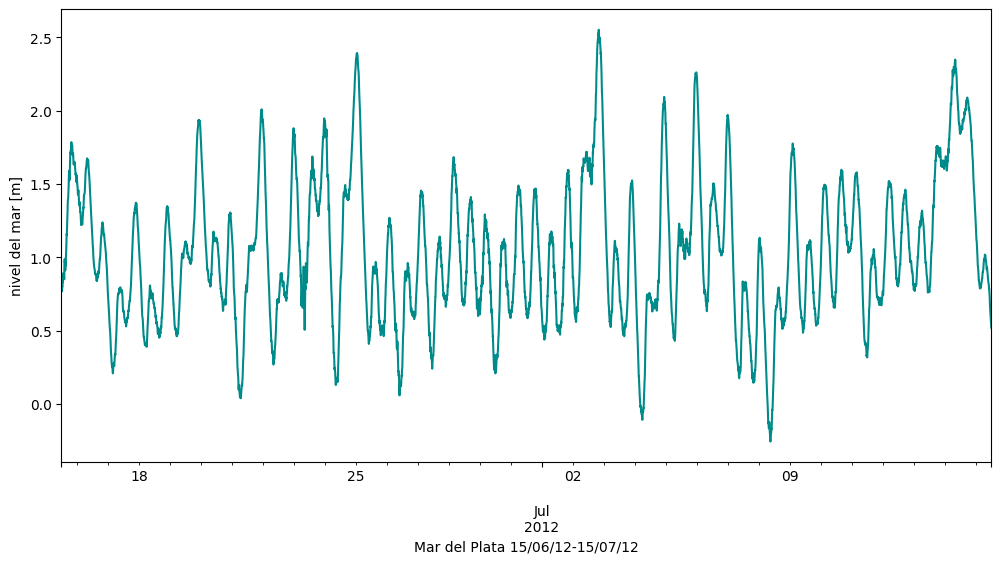

In [ ]:
mdp_1m.plot(xlabel= "Mar del Plata 15/06/12-15/07/12", ylabel= "nivel del mar [m]", figsize=(12,6), color="darkcyan")

In [ ]:
mdp_fech_1m = fechmdp[4320:12961]

In [ ]:
mdp_1m.describe()

count    8641.000000
mean        1.031806
std         0.482843
min        -0.257000
25%         0.692000
50%         0.986000
75%         1.356000
max         2.552000
Name: Niveles, dtype: float64

Los picos

In [ ]:
from scipy.signal import find_peaks #Cargo la función
posicion=find_peaks(mdp_1m, height= 1, width= 12 )[0] #--> Notar que la salida de la función findpeaks tiene 2 dimensiones 
#(en la primera tiene el índice de los picos y en la segunda las propiedades si es que se piden)
#posicion=find_peaks(mdp_1m, prominence= 0.2 )[0]

Usando las posiciones de los picos, genero una variable nueva en donde me quedo con la fehca y el registro de nivel de ese momento

In [ ]:
altas= mdp_1m.iloc[posicion]
altas

2012-06-15 19:40:00    1.785
2012-06-16 07:50:00    1.675
2012-06-16 19:45:00    1.238
2012-06-17 21:35:00    1.372
2012-06-18 21:50:00    1.349
2012-06-19 12:15:00    1.107
2012-06-19 22:15:00    1.937
2012-06-20 09:40:00    1.175
2012-06-20 22:30:00    1.304
2012-06-21 15:15:00    1.080
2012-06-21 22:55:00    2.009
2012-06-22 23:40:00    1.880
2012-06-23 14:15:00    1.687
2012-06-23 23:25:00    1.947
2012-06-25 00:40:00    2.392
2012-06-26 01:50:00    1.269
2012-06-27 02:20:00    1.455
2012-06-27 16:45:00    1.141
2012-06-28 03:35:00    1.683
2012-06-28 16:55:00    1.411
2012-06-29 03:45:00    1.292
2012-06-29 18:35:00    1.125
2012-06-30 05:45:00    1.489
2012-06-30 19:00:00    1.469
2012-07-01 07:15:00    1.176
2012-07-01 20:10:00    1.596
2012-07-02 10:40:00    1.719
2012-07-02 19:55:00    2.552
2012-07-03 08:25:00    1.112
2012-07-03 21:40:00    1.523
2012-07-04 22:35:00    2.094
2012-07-05 10:15:00    1.229
2012-07-05 12:10:00    1.190
2012-07-05 15:50:00    1.128
2012-07-05 23:

Grafico los datos

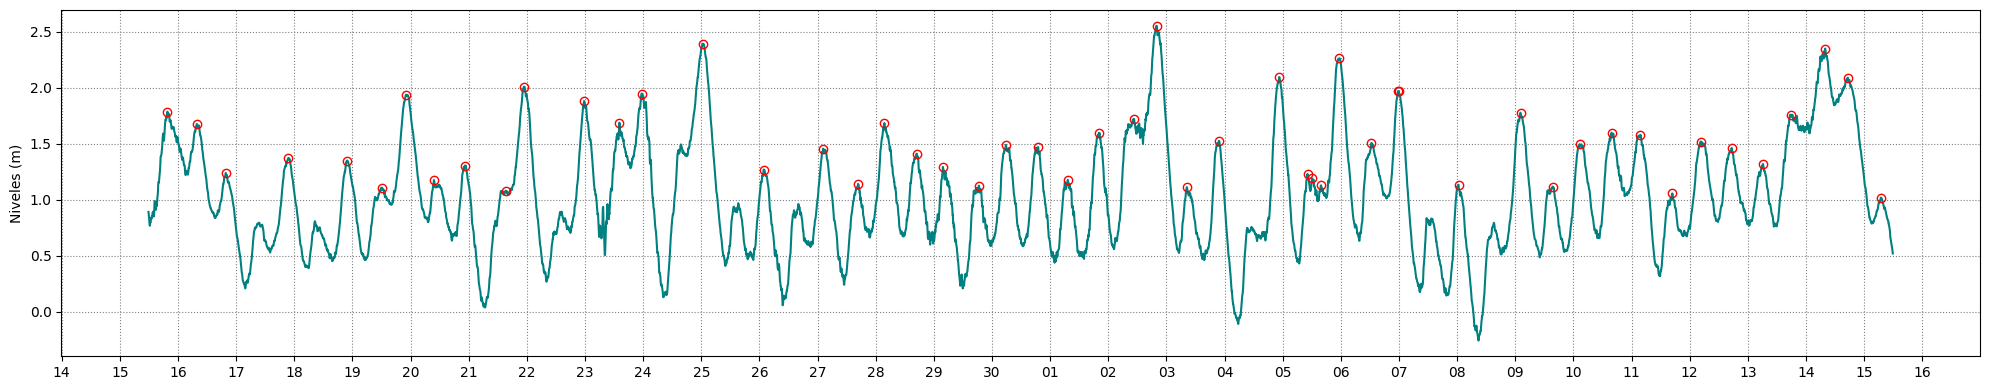

In [ ]:
fig, ax=plt.subplots(1,1,figsize=(20,4))
ax.plot(mdp_1m,'teal')
ax.plot(altas,'ro',fillstyle='none')
ax.set(ylabel="Niveles (m)")
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax.grid(color='grey',linestyle=':')
plt.tight_layout()

In [ ]:
periodos=np.diff(posicion)
periodos=np.round(periodos*5/60,2)

In [ ]:
periodos

array([12.17, 11.92, 25.83, 24.25, 14.42, 10.  , 11.42, 12.83, 16.75,
        7.67, 24.75, 14.58,  9.17, 25.25, 25.17, 24.5 , 14.42, 10.83,
       13.33, 10.83, 14.83, 11.17, 13.25, 12.25, 12.92, 14.5 ,  9.25,
       12.5 , 13.25, 24.92, 11.67,  1.92,  3.67,  7.42, 13.33, 11.08,
        0.25, 24.67, 25.58, 13.25, 11.17, 13.17, 11.92, 13.17, 11.67,
       12.83, 12.92, 11.58, 14.08,  9.33, 13.67])

In [ ]:
periodos.mean()

13.868235294117648

In [ ]:
periodos.std()

5.942356007933961

lo mismo con los valles

In [ ]:
posicion_1=find_peaks(-mdp_1m, width=12 )[0]
posicion_1

array([ 184,  329,  479,  602,  792,  910, 1072, 1200, 1204, 1384, 1503,
       1667, 1972, 2090, 2244, 2261, 2387, 2551, 2665, 2857, 2996, 3141,
       3279, 3446, 3573, 3739, 3872, 4033, 4174, 4332, 4488, 4634, 4782,
       5104, 5230, 5398, 5491, 5700, 5790, 5834, 5998, 6131, 6298, 6429,
       6588, 6699, 6891, 7013, 7187, 7312, 7487, 7620, 7774, 7929, 8051,
       8227, 8352, 8535])

In [ ]:
bajas=mdp_1m.iloc[posicion_1]
bajas

2012-06-16 03:10:00    1.220
2012-06-16 15:15:00    0.839
2012-06-17 03:45:00    0.208
2012-06-17 14:00:00    0.528
2012-06-18 05:50:00    0.389
2012-06-18 15:40:00    0.451
2012-06-19 05:10:00    0.461
2012-06-19 15:50:00    0.956
2012-06-19 16:10:00    0.956
2012-06-20 07:10:00    0.800
2012-06-20 17:05:00    0.634
2012-06-21 06:45:00    0.038
2012-06-22 08:10:00    0.268
2012-06-22 18:00:00    0.703
2012-06-23 06:50:00    0.655
2012-06-23 08:15:00    0.505
2012-06-23 18:45:00    1.280
2012-06-24 08:25:00    0.129
2012-06-24 17:55:00    1.389
2012-06-25 09:55:00    0.409
2012-06-25 21:30:00    0.462
2012-06-26 09:35:00    0.058
2012-06-26 21:05:00    0.578
2012-06-27 11:00:00    0.240
2012-06-27 21:35:00    0.662
2012-06-28 11:25:00    0.671
2012-06-28 22:30:00    0.599
2012-06-29 11:55:00    0.208
2012-06-29 23:40:00    0.588
2012-06-30 12:50:00    0.584
2012-07-01 01:50:00    0.438
2012-07-01 14:00:00    0.472
2012-07-02 02:20:00    0.558
2012-07-03 05:10:00    0.524
2012-07-03 15:

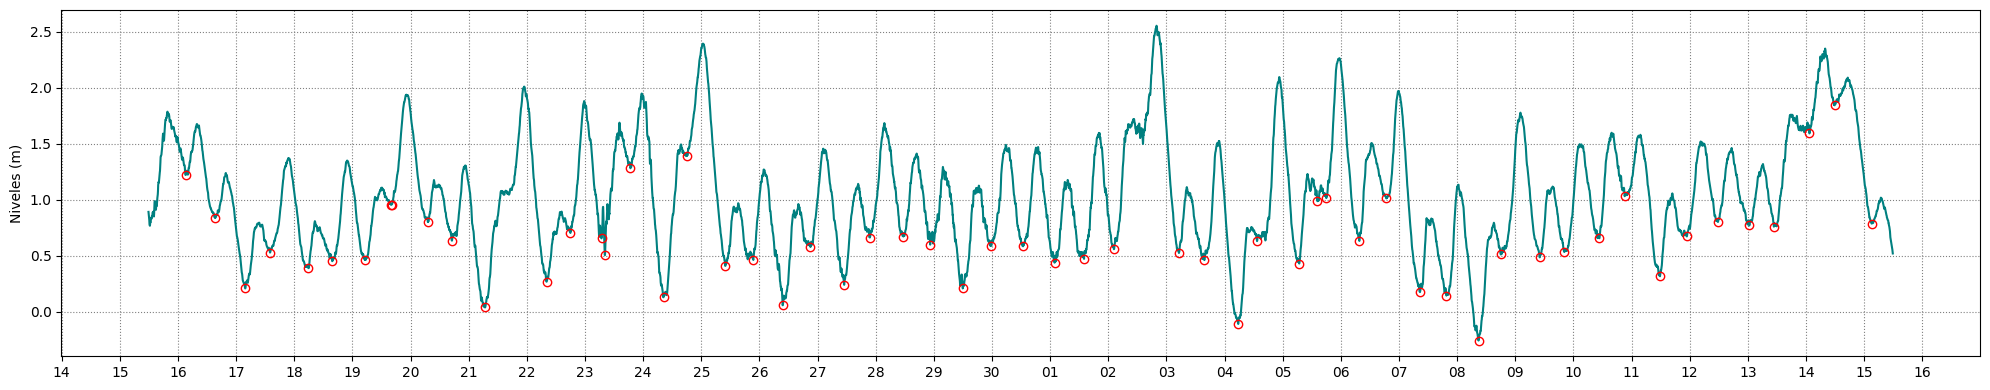

In [ ]:
fig, ax=plt.subplots(1,1,figsize=(20,4))
ax.plot(mdp_1m,'teal')
ax.plot(bajas,'ro',fillstyle='none')
ax.set(ylabel="Niveles (m)")
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax.grid(color='grey',linestyle=':')
plt.tight_layout()

In [ ]:
fig, ax=plt.subplots(1,1,figsize=(12,4))
ax.plot(mdp_1m,'darkslategrey')
ax.plot(altas,'ro',fillstyle='none')
ax.plot(bajas,'o',fillstyle='none')
ax.set(ylabel="Niveles (m)",title='mdp un mes ')
ax.xaxis.set_minor_locator(mdates.HourLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax.grid(color='grey',linestyle=':')
ax.legend(['nivel','altas','bajas'])
plt.tight_layout()

Error in callback <function flush_figures at 0x7f08fb6aa320> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
ampli_2_1m=pd.DataFrame(altas.values-bajas.values[:52])
ampli_2_1m 

0
0   0.565
1   0.836
2   1.030
3   0.844
4   0.960
5   0.656
6   1.476
7   0.219
8   0.348
9   0.280
10  1.375
11  1.842
12  1.419
13  1.244
14  1.737
15  0.764
16  0.175
17  1.012
18  0.294
19  1.002
20  0.830
21  1.067
22  0.911
23  1.229
24  0.514
25  0.925
26  1.120
27  2.344
28  0.524
29  0.939
30  1.656
31  0.757
32  0.632
33  0.604
34  1.799
35  1.613
36  1.338
37  1.538
38  0.146
39  0.762
40  0.485
41  0.483
42  1.422
43  1.435
44  1.313
45  1.008
46  0.976
47  0.785
48  1.103
49  1.317
50  1.772
51  0.346

In [ ]:
ampli_1_mdp_1m=pd.DataFrame(altas.values-bajas.values[:52])
ampli_1_mdp_1m.describe()

0
count  52.000000
mean    0.995596
std     0.496154
min     0.146000
25%     0.625000
50%     0.968000
75%     1.347250
max     2.344000

In [ ]:
periodos=np.diff(posicion)
np.round(periodos*5/60,2)

array([12.17, 11.92, 25.83, 24.25, 14.42, 10.  , 11.42, 12.83, 16.75,
        7.67, 24.75, 14.58,  9.17, 25.25, 25.17, 24.5 , 14.42, 10.83,
       13.33, 10.83, 14.83, 11.17, 13.25, 12.25, 12.92, 14.5 ,  9.25,
       12.5 , 13.25, 24.92, 11.67,  1.92,  3.67,  7.42, 13.33, 11.08,
        0.25, 24.67, 25.58, 13.25, 11.17, 13.17, 11.92, 13.17, 11.67,
       12.83, 12.92, 11.58, 14.08,  9.33, 13.67])

In [ ]:
periodos=np.diff(posicion_1)
np.round(periodos*5/60,2)

array([12.08, 12.5 , 10.25, 15.83,  9.83, 13.5 , 10.67,  0.33, 15.  ,
        9.92, 13.67, 25.42,  9.83, 12.83,  1.42, 10.5 , 13.67,  9.5 ,
       16.  , 11.58, 12.08, 11.5 , 13.92, 10.58, 13.83, 11.08, 13.42,
       11.75, 13.17, 13.  , 12.17, 12.33, 26.83, 10.5 , 14.  ,  7.75,
       17.42,  7.5 ,  3.67, 13.67, 11.08, 13.92, 10.92, 13.25,  9.25,
       16.  , 10.17, 14.5 , 10.42, 14.58, 11.08, 12.83, 12.92, 10.17,
       14.67, 10.42, 15.25])

(array([ 2.,  1.,  2., 15., 19., 15.,  1.,  0.,  0.,  2.]),
 array([ 0.33333333,  2.98333333,  5.63333333,  8.28333333, 10.93333333,
        13.58333333, 16.23333333, 18.88333333, 21.53333333, 24.18333333,
        26.83333333]),
 <a list of 10 Patch objects>)

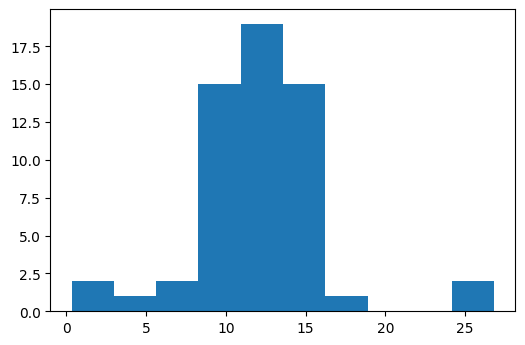

In [ ]:
plt.hist(periodos*5/60)

Paso info a un array

In [ ]:
x_mdp_1m=np.squeeze(mdp_1m-mdp_1m.mean())
np.info(x_mdp_1m)

One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object
supports both integer- and label-based indexing and provides a host of
methods for performing operations involving the index. Statistical
methods from ndarray have been overridden to automatically exclude
missing data (currently represented as NaN).

Operations between Series (+, -, /, *, **) align values based on their
associated index values-- they need not be the same length. The result
index will be the sorted union of the two indexes.

Parameters
----------
data : array-like, Iterable, dict, or scalar value
    Contains data stored in Series. If data is a dict, argument order is
    maintained.
index : array-like or Index (1d)
    Values must be hashable and have the same length as `data`.
    Non-unique index values are allowed. Will default to
    RangeIndex (0, 1, 2, ..., n) if not provided. If data is dict-like
    and index is None, then the key

Defino el espacio de frecuencias
frecuencia de muestreo fs
frecuencia de nysquist fn
ff: frecuencia minima visble

todo se divide por 60 asi los datos aparecen en horas

Todo eso mas facil aca

In [ ]:
freq_mdp_1m=np.fft.fftfreq(x_mdp_1m.size,d=5*60)
freq_mdp_1m

array([ 0.00000000e+00,  3.85757821e-07,  7.71515642e-07, ...,
       -1.15727346e-06, -7.71515642e-07, -3.85757821e-07])

Transformada de fourier

In [ ]:
Y_mdp_1m=np.fft.fft(x_mdp_1m)

In [ ]:
xff_mdp_1m=(1/len(Y_mdp_1m))*np.abs(Y_mdp_1m)#Y_mdp.real

In [ ]:
freq_mdp_1m.size

8641

In [ ]:
xff_mdp_1m.size

8641

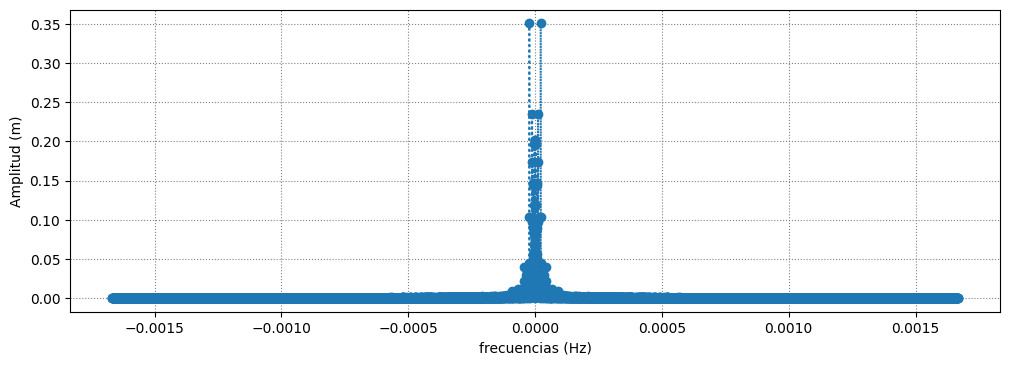

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(freq_mdp_1m,xff_mdp_1m*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='frecuencias (Hz)')
axs.grid(color='grey',ls=':',which='both')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f08fb6a1830> (for post_execute):


KeyboardInterrupt: ignored

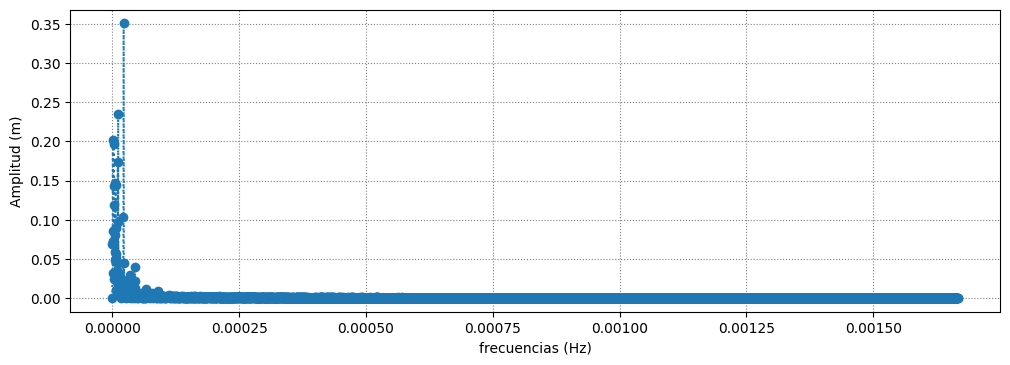

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(freq_mdp_1m[freq_mdp_1m>=0],xff_mdp_1m[freq_mdp_1m>=0]*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='frecuencias (Hz)')
axs.grid(color='grey',ls=':',which='both')

In [ ]:
per_mdp_1m=(1/freq_mdp_1m[1::])/3600

In [ ]:
per_mdp_1m=np.append(per_mdp_1m,0)
per_mdp_1m

array([ 720.08333333,  360.04166667,  240.02777778, ..., -360.04166667,
       -720.08333333,    0.        ])

In [ ]:
per_mdp_1m.size

8641

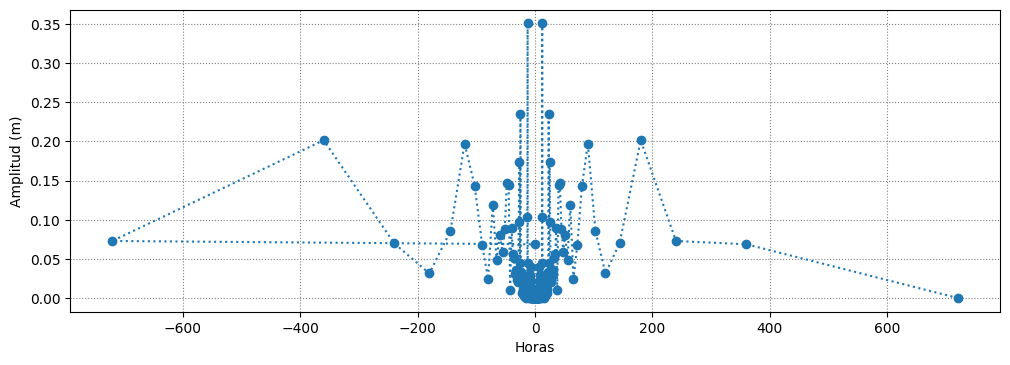

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(per_mdp_1m,xff_mdp_1m[::1]*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='Horas')
axs.grid(color='grey',ls=':',which='both')

In [ ]:
per_mdp_1m[9:100]

array([72.00833333, 65.46212121, 60.00694444, 55.39102564, 51.43452381,
       48.00555556, 45.00520833, 42.35784314, 40.00462963, 37.89912281,
       36.00416667, 34.28968254, 32.73106061, 31.30797101, 30.00347222,
       28.80333333, 27.69551282, 26.66975309, 25.7172619 , 24.83045977,
       24.00277778, 23.22849462, 22.50260417, 21.82070707, 21.17892157,
       20.57380952, 20.00231481, 19.46171171, 18.9495614 , 18.46367521,
       18.00208333, 17.56300813, 17.14484127, 16.74612403, 16.3655303 ,
       16.00185185, 15.65398551, 15.32092199, 15.00173611, 14.69557823,
       14.40166667, 14.11928105, 13.84775641, 13.58647799, 13.33487654,
       13.09242424, 12.85863095, 12.63304094, 12.41522989, 12.20480226,
       12.00138889, 11.80464481, 11.61424731, 11.42989418, 11.25130208,
       11.07820513, 10.91035354, 10.74751244, 10.58946078, 10.43599034,
       10.28690476, 10.14201878, 10.00115741,  9.86415525,  9.73085586,
        9.60111111,  9.4747807 ,  9.3517316 ,  9.23183761,  9.11

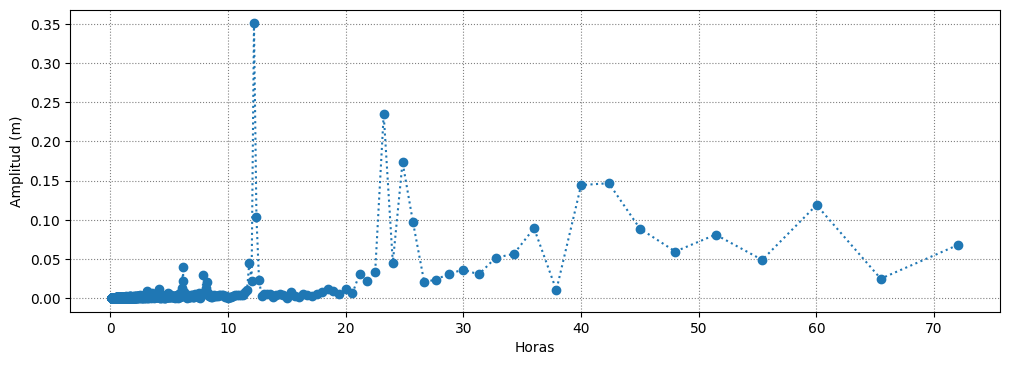

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(per_mdp_1m[9:4320],xff_mdp_1m[9:4320]*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='Horas')
axs.grid(color='grey',ls=':',which='both')

Zoom mayor a 10 hs

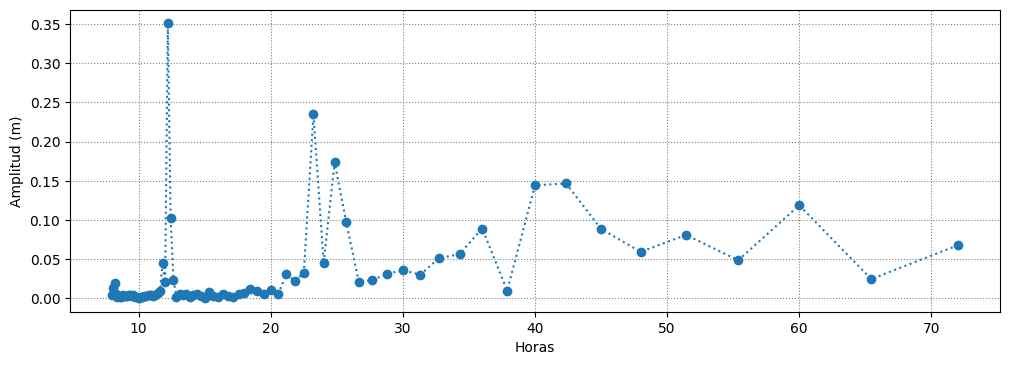

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(per_mdp_1m[9:90],xff_mdp_1m[9:90]*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='Horas')
axs.grid(color='grey',ls=':',which='both')

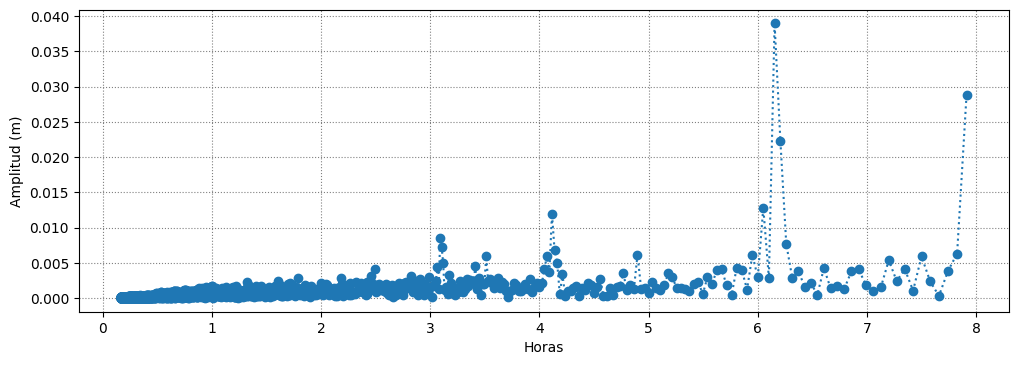

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(per_mdp_1m[90:4320],xff_mdp_1m[90:4320]*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='Horas')
axs.grid(color='grey',ls=':',which='both')

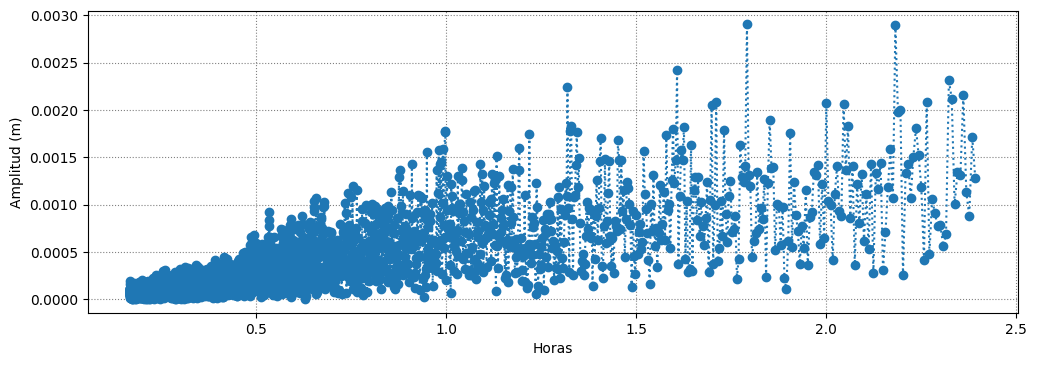

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(per_mdp_1m[300:4320],xff_mdp_1m[300:4320]*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='Horas')
axs.grid(color='grey',ls=':',which='both')

# El mismo mes de interes, sin marea

In [ ]:
!wget https://raw.githubusercontent.com/lupalon/Mareas2022/main/MdP_15_06_15_07_2012_sinmarea.xlsx
mdp_fil=pd.read_excel(r'MdP_15_06_15_07_2012_sinmarea.xlsx')

--2022-09-19 02:49:43--  https://raw.githubusercontent.com/lupalon/Mareas2022/main/MdP_15_06_15_07_2012_sinmarea.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358697 (350K) [application/octet-stream]
Saving to: ‘MdP_15_06_15_07_2012_sinmarea.xlsx.5’

MdP_15_06_15_07_201 100%[===================>] 350.29K  --.-KB/s    in 0.08s   

2022-09-19 02:49:43 (4.34 MB/s) - ‘MdP_15_06_15_07_2012_sinmarea.xlsx.5’ saved [358697/358697]



In [ ]:
mdp_fil.set_index(mdp_fil.FECHA,drop=True,inplace=True)
mdp_fil

FECHA      FIL1    FIL2
FECHA                                                    
2012-06-15 00:00:00 2012-06-15 00:00:00  0.224666  0.0061
2012-06-15 00:05:00 2012-06-15 00:05:00  0.225198  0.0064
2012-06-15 00:10:00 2012-06-15 00:10:00  0.222443  0.0037
2012-06-15 00:15:00 2012-06-15 00:15:00  0.221391  0.0029
2012-06-15 00:20:00 2012-06-15 00:20:00  0.199029 -0.0190
...                                 ...       ...     ...
2012-07-15 23:35:00 2012-07-15 23:35:00 -0.518018  0.0114
2012-07-15 23:40:00 2012-07-15 23:40:00 -0.518657  0.0071
2012-07-15 23:45:00 2012-07-15 23:45:00 -0.515229  0.0070
2012-07-15 23:50:00 2012-07-15 23:50:00 -0.519760 -0.0012
2012-07-15 23:55:00 2012-07-15 23:55:00 -0.511275  0.0038

[8928 rows x 3 columns]

In [ ]:
mdp_fil.drop(['FECHA','FIL2'],axis=1,inplace=True) #dice fila 2 pero muestra la uno, no entiendo
mdp_fil 

FIL1
FECHA                        
2012-06-15 00:00:00  0.224666
2012-06-15 00:05:00  0.225198
2012-06-15 00:10:00  0.222443
2012-06-15 00:15:00  0.221391
2012-06-15 00:20:00  0.199029
...                       ...
2012-07-15 23:35:00 -0.518018
2012-07-15 23:40:00 -0.518657
2012-07-15 23:45:00 -0.515229
2012-07-15 23:50:00 -0.519760
2012-07-15 23:55:00 -0.511275

[8928 rows x 1 columns]

In [ ]:
mdp_fil.describe()

FIL1
count  8928.000000
mean      0.135587
std       0.351466
min      -0.658820
25%      -0.088709
50%       0.100688
75%       0.344160
max       1.376936

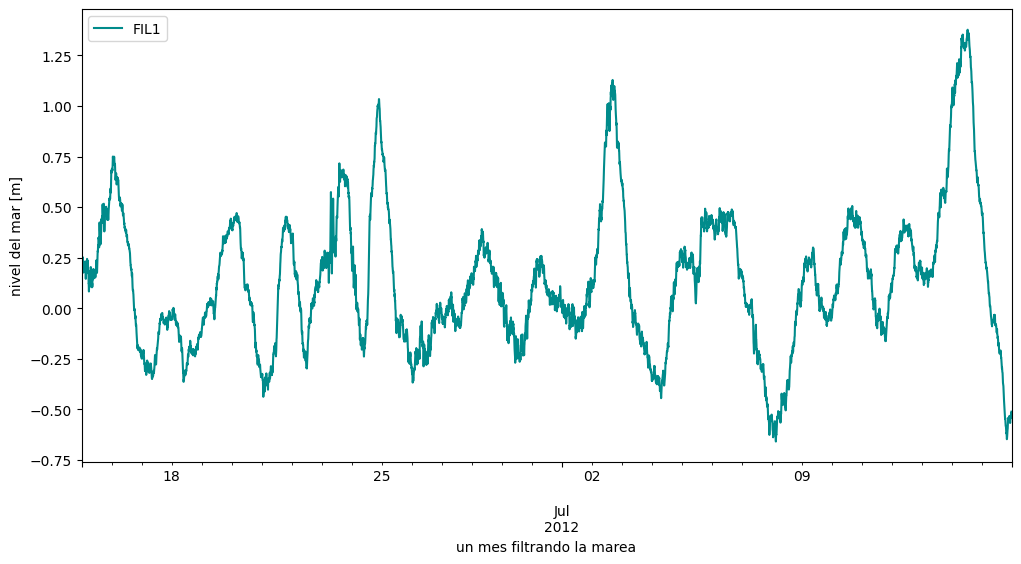

In [ ]:
mdp_fil.plot(xlabel= "un mes filtrando la marea", ylabel= "nivel del mar [m]", figsize=(12,6), color="darkcyan")

los picos

In [ ]:
from scipy.signal import find_peaks #Cargo la función
posicion=find_peaks(mdp_fil.FIL1,  prominence= 0.1)[0] #--> Notar que la salida de la función findpeaks tiene 2 dimensiones 
#(en la primera tiene el índice de los picos y en la segunda las propiedades si es que se piden)

Usando las posiciones de los picos, genero una variable nueva en donde me quedo con la fehca y el registro de nivel de ese momento

In [ ]:
altas= mdp_fil.iloc[posicion]

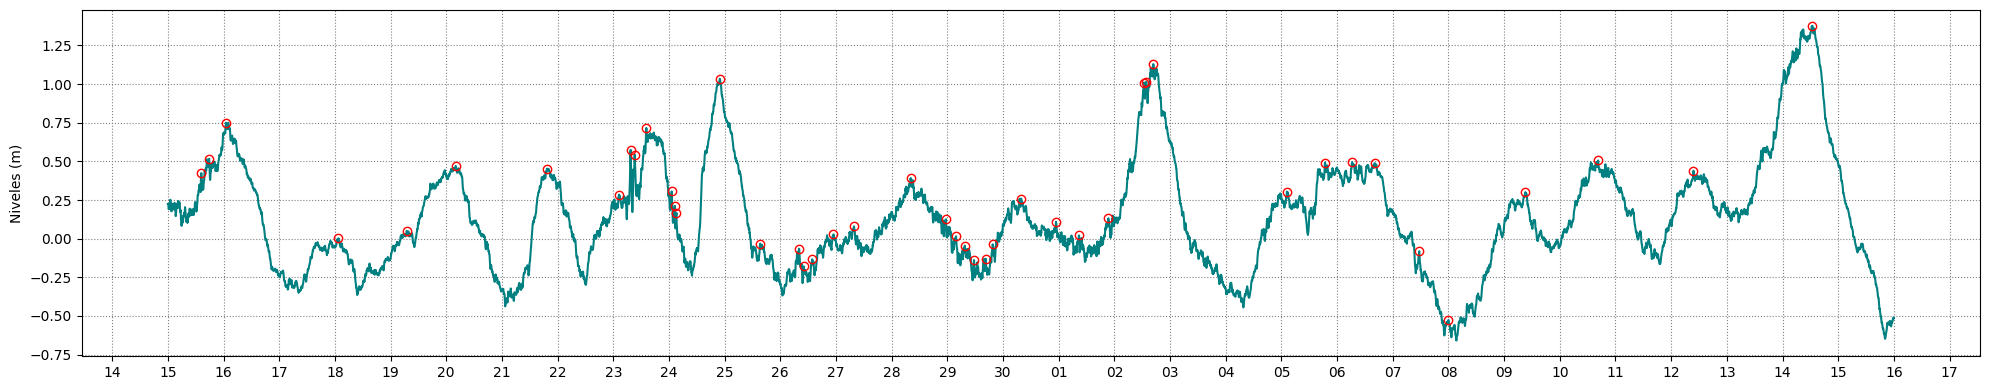

In [ ]:
fig, ax=plt.subplots(1,1,figsize=(20,4))
ax.plot(mdp_fil,'teal')
ax.plot(altas,'ro',fillstyle='none')
ax.set(ylabel="Niveles (m)")
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax.grid(color='grey',linestyle=':')
plt.tight_layout()

In [ ]:
periodos=np.diff(posicion)
np.round(periodos*5/60,2)

array([ 3.42,  7.25, 48.42, 29.5 , 21.08, 39.33, 31.08,  5.  ,  1.75,
        5.  , 10.92,  1.42,  0.67, 18.67, 17.42, 16.75,  2.  ,  3.67,
        9.17,  8.83, 24.42, 15.25,  4.33,  3.75,  4.  ,  5.  ,  3.08,
       12.25, 15.  ,  9.92, 12.67, 15.42,  0.92,  3.08, 57.5 , 16.5 ,
       11.67,  9.67, 19.25, 12.58, 33.17, 31.33, 41.08, 51.25])

In [ ]:
periodos=np.diff(posicion)
np.round(periodos*5/60,2)


array([ 3.42,  7.25, 48.42, 29.5 , 21.08, 39.33, 31.08,  5.  ,  1.75,
        5.  , 10.92,  1.42,  0.67, 18.67, 17.42, 16.75,  2.  ,  3.67,
        9.17,  8.83, 24.42, 15.25,  4.33,  3.75,  4.  ,  5.  ,  3.08,
       12.25, 15.  ,  9.92, 12.67, 15.42,  0.92,  3.08, 57.5 , 16.5 ,
       11.67,  9.67, 19.25, 12.58, 33.17, 31.33, 41.08, 51.25])

In [ ]:

ordenados = sorted(np.round(periodos*5/60,2), reverse=False)
ordenados[0:22]

[0.67,
 0.92,
 1.42,
 1.75,
 2.0,
 3.08,
 3.08,
 3.42,
 3.67,
 3.75,
 4.0,
 4.33,
 5.0,
 5.0,
 5.0,
 7.25,
 8.83,
 9.17,
 9.67,
 9.92,
 10.92,
 11.67]

(array([4., 1., 5., 5., 0., 1., 0., 2., 2., 2.]),
 array([ 0.67,  1.77,  2.87,  3.97,  5.07,  6.17,  7.27,  8.37,  9.47,
        10.57, 11.67]),
 <a list of 10 Patch objects>)

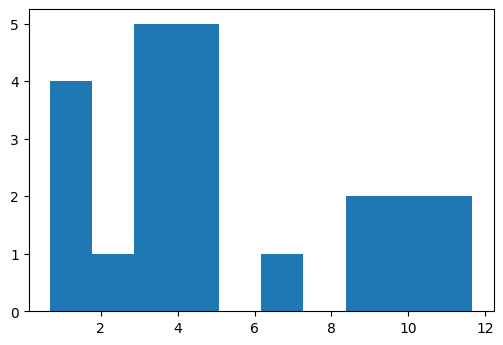

In [ ]:
plt.hist(ordenados[0:22])

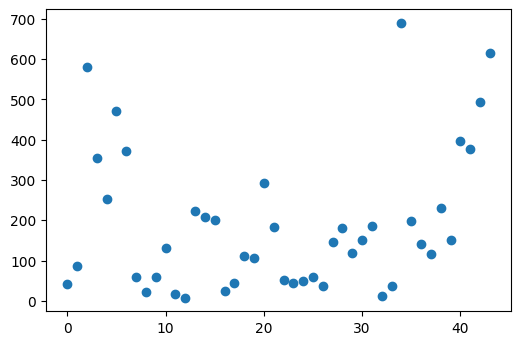

In [ ]:
plt.plot(periodos, "o")

In [ ]:
posicion_1=find_peaks(-mdp_fil.FIL1, prominence= 0.1)[0] #--> Notar que la salida de la función findpeaks tiene 2 dimensiones 
#(en la primera tiene el índice de los picos y en la segunda las propiedades si es que se piden)

In [ ]:
bajas= mdp_fil.iloc[posicion_1]
bajas

FIL1
FECHA                        
2012-06-15 05:55:00  0.082900
2012-06-15 14:55:00  0.314828
2012-06-15 18:15:00  0.379878
2012-06-17 08:20:00 -0.348327
2012-06-18 09:40:00 -0.363796
2012-06-19 10:15:00 -0.054585
2012-06-21 01:25:00 -0.437662
2012-06-22 12:15:00 -0.297737
2012-06-23 05:50:00  0.125788
2012-06-23 08:15:00  0.171972
2012-06-23 11:10:00  0.255511
2012-06-24 00:30:00  0.184446
2012-06-24 01:45:00  0.102186
2012-06-24 02:50:00  0.066064
2012-06-24 09:55:00 -0.238721
2012-06-25 14:05:00 -0.143778
2012-06-26 00:55:00 -0.367331
2012-06-26 09:35:00 -0.287216
2012-06-26 11:50:00 -0.280245
2012-06-26 14:50:00 -0.236424
2012-06-27 02:35:00 -0.094707
2012-06-27 11:00:00 -0.113035
2012-06-28 22:30:00  0.016128
2012-06-29 02:10:00 -0.091430
2012-06-29 05:35:00 -0.172644
2012-06-29 10:55:00 -0.269259
2012-06-29 14:30:00 -0.264512
2012-06-29 17:10:00 -0.233654
2012-06-29 20:30:00 -0.149683
2012-06-30 20:10:00 -0.015457
2012-07-01 06:25:00 -0.103887
2012-07-01 11:20:00 -0.150386
2012-07-01 22:20:00  0.004543
2012-07-02 13:10:00  0.905563
2012-07-02 14:20:00  0.876245
2012-07-04 07:35:00 -0.444516
2012-07-05 11:25:00  0.024179
2012-07-06 02:30:00  0.339584
2012-07-06 11:40:00  0.353739
2012-07-07 09:55:00 -0.223789
2012-07-07 22:15:00 -0.626003
2012-07-08 03:25:00 -0.658820
2012-07-09 20:15:00 -0.087260
2012-07-11 19:00:00 -0.162845
2012-07-13 05:05:00  0.105785
2012-07-15 20:10:00 -0.647308

In [ ]:
ampli_1=pd.DataFrame(altas.values-bajas[1:].values)
ampli_1

0
0   0.109207
1   0.136869
2   1.098250
3   0.365613
4   0.105358
5   0.908300
6   0.749990
7   0.158946
8   0.402325
9   0.286483
10  0.531744
11  0.202864
12  0.146109
13  0.404840
14  1.177957
15  0.335085
16  0.222093
17  0.100831
18  0.103310
19  0.122144
20  0.191916
21  0.374158
22  0.217065
23  0.187899
24  0.223919
25  0.126185
26  0.104224
27  0.113035
28  0.274446
29  0.212971
30  0.170842
31  0.126922
32  0.103985
33  0.137325
34  1.573089
35  0.280251
36  0.152711
37  0.141260
38  0.712193
39  0.544522
40  0.133137
41  0.387746
42  0.668494
43  0.333204
44  2.024244

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08d5d53ad0>]],
      dtype=object)

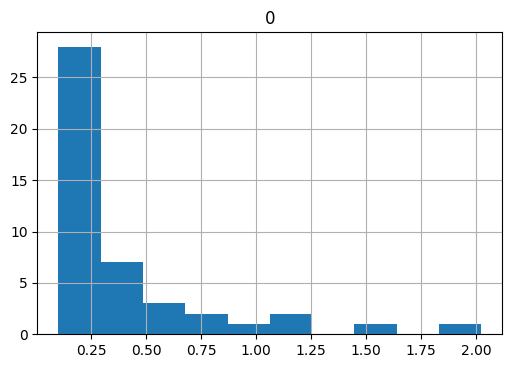

In [ ]:
ampli_1.hist()

In [ ]:
periodos=np.diff(posicion_1)
np.round(periodos*5/60,2)

array([25.33, 63.75, 34.83, 20.  ,  2.92, 22.75, 39.  ,  8.67, 73.33,
       48.42, 68.25, 27.83, 64.  , 40.83, 46.75, 34.08])

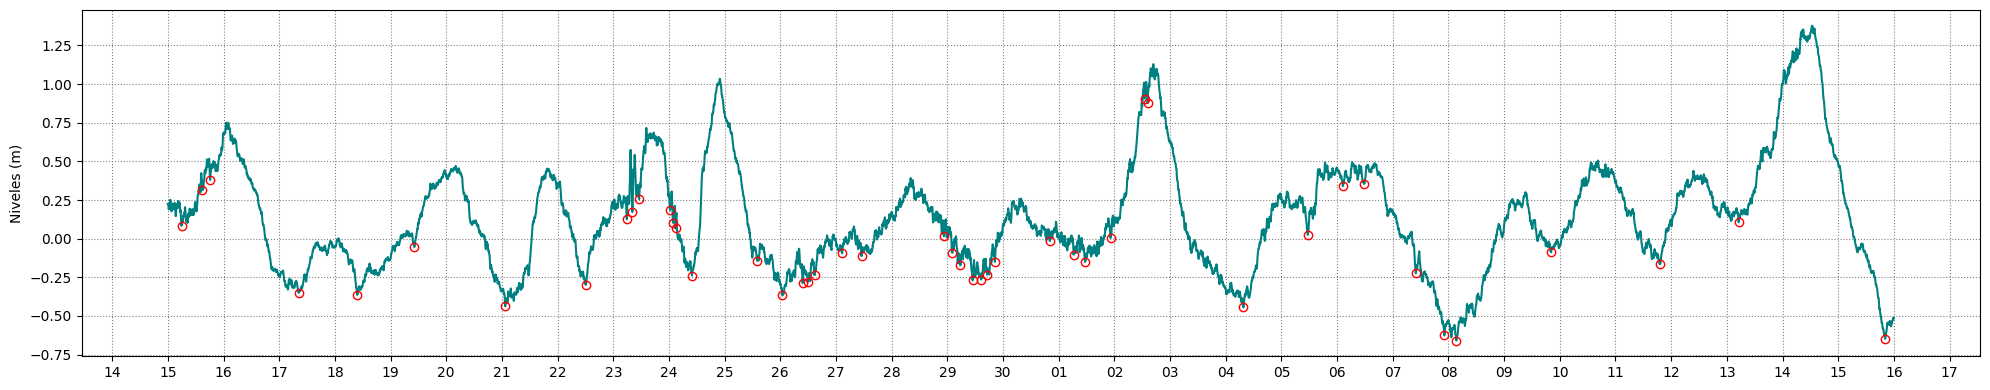

In [ ]:
fig, ax=plt.subplots(1,1,figsize=(20,4))
ax.plot(mdp_fil,'teal')
ax.plot(bajas,'ro',fillstyle='none')
ax.set(ylabel="Niveles (m)")
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax.grid(color='grey',linestyle=':')
plt.tight_layout()

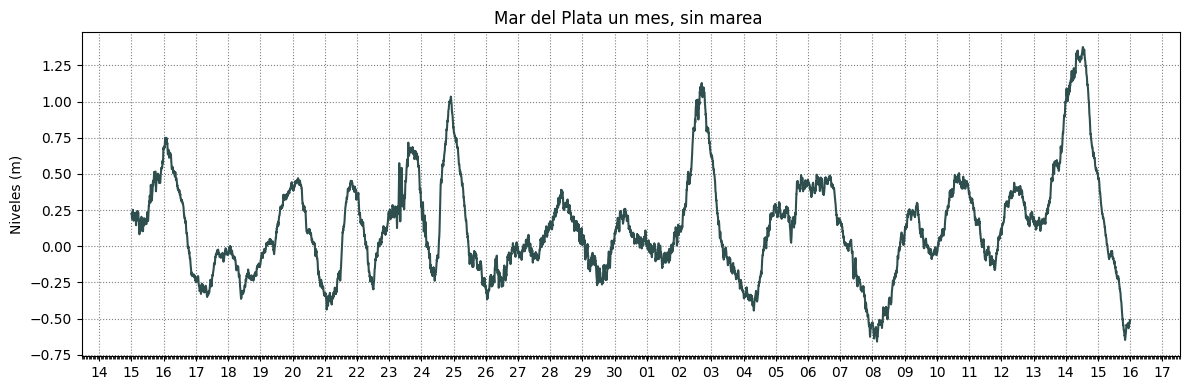

In [ ]:
fig, ax=plt.subplots(1,1,figsize=(12,4))
ax.plot(mdp_fil,'darkslategrey')
ax.set(ylabel="Niveles (m)",title='Mar del Plata un mes, sin marea ')
ax.xaxis.set_minor_locator(mdates.HourLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax.grid(color='grey',linestyle=':')
plt.tight_layout()

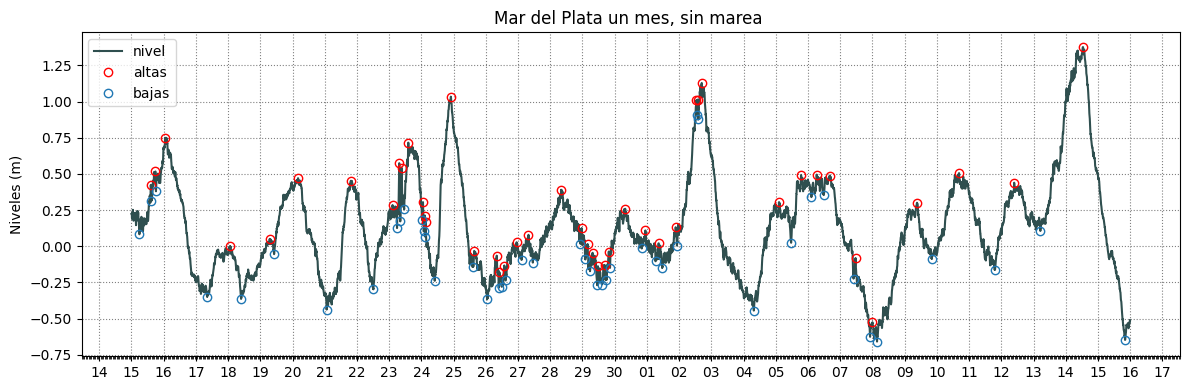

In [ ]:
fig, ax=plt.subplots(1,1,figsize=(12,4))
ax.plot(mdp_fil,'darkslategrey')
ax.plot(altas,'ro',fillstyle='none')
ax.plot(bajas,'o',fillstyle='none')
ax.set(ylabel="Niveles (m)",title='Mar del Plata un mes, sin marea ')
ax.xaxis.set_minor_locator(mdates.HourLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax.grid(color='grey',linestyle=':')
ax.legend(['nivel','altas', "bajas"])
plt.tight_layout()

In [ ]:
mdp_fil

FIL1
FECHA                        
2012-06-15 00:00:00  0.224666
2012-06-15 00:05:00  0.225198
2012-06-15 00:10:00  0.222443
2012-06-15 00:15:00  0.221391
2012-06-15 00:20:00  0.199029
...                       ...
2012-07-15 23:35:00 -0.518018
2012-07-15 23:40:00 -0.518657
2012-07-15 23:45:00 -0.515229
2012-07-15 23:50:00 -0.519760
2012-07-15 23:55:00 -0.511275

[8928 rows x 1 columns]

AttributeError: ignored

Paso info a un array

In [ ]:
x_mdp_fil=np.squeeze(mdp_fil-mdp_fil.mean())
np.info(x_mdp_fil)

One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object
supports both integer- and label-based indexing and provides a host of
methods for performing operations involving the index. Statistical
methods from ndarray have been overridden to automatically exclude
missing data (currently represented as NaN).

Operations between Series (+, -, /, *, **) align values based on their
associated index values-- they need not be the same length. The result
index will be the sorted union of the two indexes.

Parameters
----------
data : array-like, Iterable, dict, or scalar value
    Contains data stored in Series. If data is a dict, argument order is
    maintained.
index : array-like or Index (1d)
    Values must be hashable and have the same length as `data`.
    Non-unique index values are allowed. Will default to
    RangeIndex (0, 1, 2, ..., n) if not provided. If data is dict-like
    and index is None, then the key

Defino el espacio de frecuencias
frecuencia de muestreo fs
frecuencia de nysquist fn
ff: frecuencia minima visble

todo se divide por 60 asi los datos aparecen en horas

Todo eso mas facil aca

In [ ]:
freq_mdp_fil=np.fft.fftfreq(x_mdp_fil.size,d=5*60)
freq_mdp_fil

array([ 0.00000000e+00,  3.73357228e-07,  7.46714456e-07, ...,
       -1.12007168e-06, -7.46714456e-07, -3.73357228e-07])

Transformada de fourier

In [ ]:
Y_mdp_fil=np.fft.fft(x_mdp_fil)

In [ ]:
xff_mdp_fil=(1/len(Y_mdp_fil))*np.abs(Y_mdp_fil)#Y_mdp.real

In [ ]:
freq_mdp_fil.size

8928

In [ ]:
xff_mdp_fil

array([2.29182464e-17, 3.33611502e-02, 4.62910363e-02, ...,
       9.28602238e-02, 4.62910363e-02, 3.33611502e-02])

In [ ]:
xff_mdp_fil.size

8928

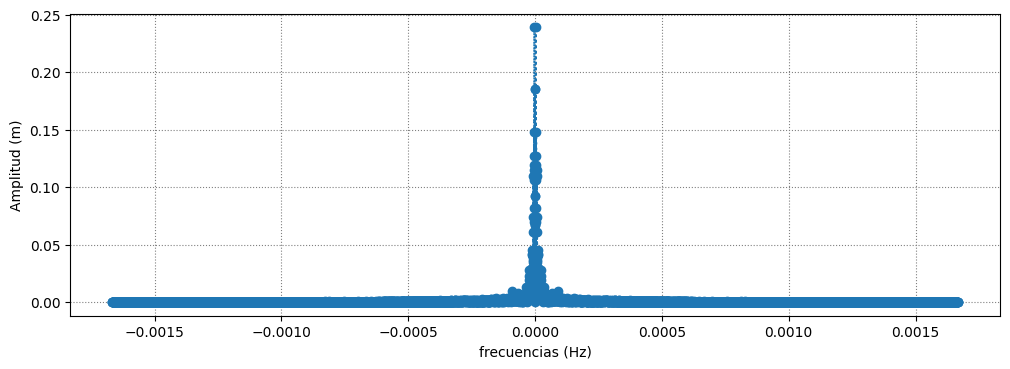

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(freq_mdp_fil,xff_mdp_fil*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='frecuencias (Hz)')
axs.grid(color='grey',ls=':',which='both')

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(freq_mdp_fil[freq_mdp_fil>=0],xff_mdp_fil[freq_mdp_fil>=0]*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='frecuencias (Hz)')
axs.grid(color='grey',ls=':',which='both')

In [ ]:
per_mdp_fil=(1/freq_mdp_fil[1::])/3600

In [ ]:
per_mdp_fil=np.append(per_mdp_fil,0)
per_mdp_fil

array([ 744.,  372.,  248., ..., -372., -744.,    0.])

In [ ]:
per_mdp_fil.size

8928

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(per_mdp_fil,xff_mdp_fil[::1]*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='Horas')
axs.grid(color='grey',ls=':',which='both')

In [ ]:
per_mdp_fil[7:800]

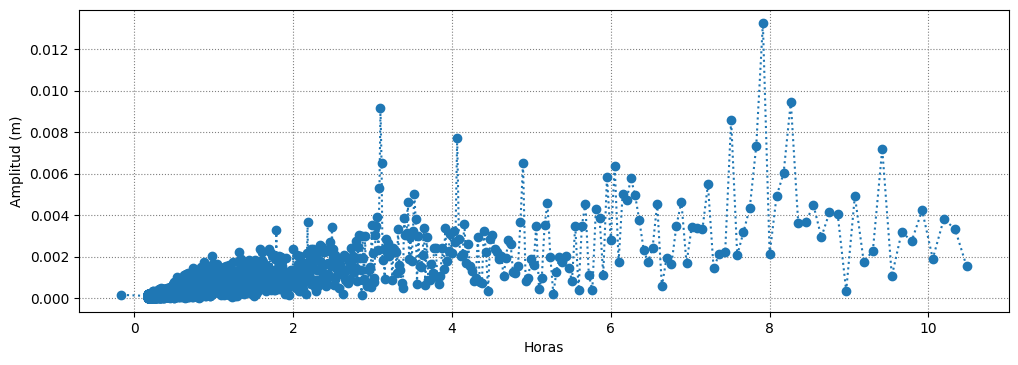

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(per_mdp_fil[70:4464],xff_mdp_fil[70:4464]*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='Horas')
axs.grid(color='grey',ls=':',which='both')

# Montevideo

In [ ]:
mtv= pd.read_excel(r'/content/Montevideo_Nov_10_2018 (4).xlsx')
mtv

date  NiveldelMar
0   2018-11-09 00:03:00        0.309
1   2018-11-09 00:08:00        0.301
2   2018-11-09 00:13:00        0.301
3   2018-11-09 00:14:00        0.301
4   2018-11-09 00:18:00        0.313
..                  ...          ...
795 2018-11-10 23:35:00        0.975
796 2018-11-10 23:36:00        0.975
797 2018-11-10 23:40:00        0.955
798 2018-11-10 23:41:00        0.955
799 2018-11-10 23:46:00        0.962

[800 rows x 2 columns]

In [ ]:
mtv.set_index(mtv.date,drop=True,inplace=True)
mtv

date  NiveldelMar
date                                                
2018-11-09 00:03:00 2018-11-09 00:03:00        0.309
2018-11-09 00:08:00 2018-11-09 00:08:00        0.301
2018-11-09 00:13:00 2018-11-09 00:13:00        0.301
2018-11-09 00:14:00 2018-11-09 00:14:00        0.301
2018-11-09 00:18:00 2018-11-09 00:18:00        0.313
...                                 ...          ...
2018-11-10 23:35:00 2018-11-10 23:35:00        0.975
2018-11-10 23:36:00 2018-11-10 23:36:00        0.975
2018-11-10 23:40:00 2018-11-10 23:40:00        0.955
2018-11-10 23:41:00 2018-11-10 23:41:00        0.955
2018-11-10 23:46:00 2018-11-10 23:46:00        0.962

[800 rows x 2 columns]

In [ ]:
mtv_niveles= mtv.NiveldelMar
mtv_niveles

date
2018-11-09 00:03:00    0.309
2018-11-09 00:08:00    0.301
2018-11-09 00:13:00    0.301
2018-11-09 00:14:00    0.301
2018-11-09 00:18:00    0.313
                       ...  
2018-11-10 23:35:00    0.975
2018-11-10 23:36:00    0.975
2018-11-10 23:40:00    0.955
2018-11-10 23:41:00    0.955
2018-11-10 23:46:00    0.962
Name: NiveldelMar, Length: 800, dtype: float64

In [ ]:
mtv.date

date
2018-11-09 00:03:00   2018-11-09 00:03:00
2018-11-09 00:08:00   2018-11-09 00:08:00
2018-11-09 00:13:00   2018-11-09 00:13:00
2018-11-09 00:14:00   2018-11-09 00:14:00
2018-11-09 00:18:00   2018-11-09 00:18:00
                              ...        
2018-11-10 23:35:00   2018-11-10 23:35:00
2018-11-10 23:36:00   2018-11-10 23:36:00
2018-11-10 23:40:00   2018-11-10 23:40:00
2018-11-10 23:41:00   2018-11-10 23:41:00
2018-11-10 23:46:00   2018-11-10 23:46:00
Name: date, Length: 800, dtype: datetime64[ns]

In [ ]:
mtv.describe()

NiveldelMar
count   800.000000
mean      0.982468
std       0.368316
min       0.251000
25%       0.806000
50%       1.035000
75%       1.175000
max       2.478000

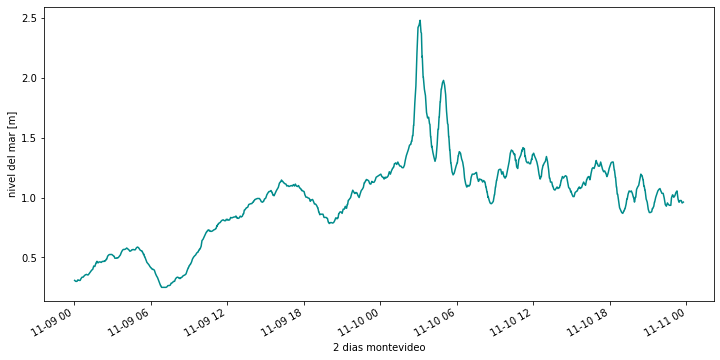

In [ ]:
mtv_niveles.plot(xlabel= "2 dias montevideo", ylabel= "nivel del mar [m]", figsize=(12,6), color="darkcyan")

Picos

In [ ]:
posicion=find_peaks(mtv_niveles, prominence= 0.15)[0] #--> Notar que la salida de la función findpeaks tiene 2 dimensiones 
#(en la primera tiene el índice de los picos y en la segunda las propiedades si es que se piden)
posicion

array([ 81, 270, 449, 481, 502, 569, 585, 617, 682, 741])

In [ ]:
altas= mtv_niveles.iloc[posicion]
altas

date
2018-11-09 04:58:00    0.587
2018-11-09 16:16:00    1.146
2018-11-10 03:08:00    2.478
2018-11-10 04:58:00    1.977
2018-11-10 06:12:00    1.382
2018-11-10 10:17:00    1.396
2018-11-10 11:12:00    1.416
2018-11-10 13:02:00    1.342
2018-11-10 16:56:00    1.309
2018-11-10 20:26:00    1.195
Name: NiveldelMar, dtype: float64

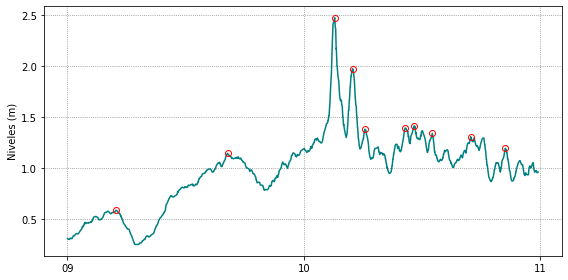

In [ ]:
fig, ax=plt.subplots(1,1,figsize=(8,4))
ax.plot(mtv_niveles,'teal')
ax.plot(altas,'ro',fillstyle='none')
ax.set(ylabel="Niveles (m)")
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax.grid(color='grey',linestyle=':')
plt.tight_layout()

In [ ]:
posicion_valles=find_peaks(-mtv_niveles, prominence= 0.15)[0] #--> Notar que la salida de la función findpeaks tiene 2 dimensiones 
#(en la primera tiene el índice de los picos y en la segunda las propiedades si es que se piden)
posicion_valles

array([114, 334, 469, 494, 544, 579, 607, 652, 717, 753])

In [ ]:
bajas= mtv_niveles.iloc[posicion_valles]
bajas

date
2018-11-09 06:57:00    0.251
2018-11-09 20:00:00    0.784
2018-11-10 04:18:00    1.302
2018-11-10 05:43:00    1.189
2018-11-10 08:42:00    0.948
2018-11-10 10:47:00    1.242
2018-11-10 12:32:00    1.155
2018-11-10 15:07:00    1.008
2018-11-10 19:01:00    0.868
2018-11-10 21:06:00    0.875
Name: NiveldelMar, dtype: float64

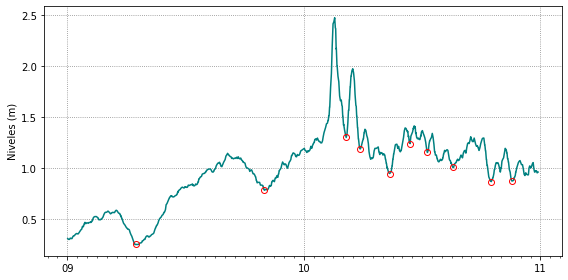

In [ ]:
fig, ax=plt.subplots(1,1,figsize=(8,4))
ax.plot(mtv_niveles,'teal')
ax.plot(bajas,'ro',fillstyle='none')
ax.set(ylabel="Niveles (m)")
ax.xaxis.set_minor_locator(mdates.HourLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax.grid(color='grey',linestyle=':')
plt.tight_layout()

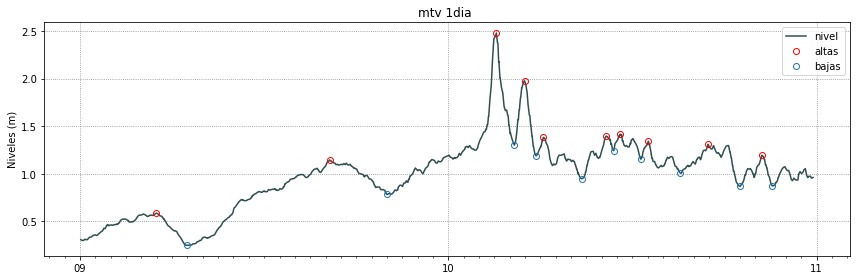

In [ ]:
fig, ax=plt.subplots(1,1,figsize=(12,4))
ax.plot(mtv_niveles,'darkslategrey')
ax.plot(altas,'ro',fillstyle='none')
ax.plot(bajas,'o',fillstyle='none')
ax.set(ylabel="Niveles (m)",title='mtv 1dia ')
ax.xaxis.set_minor_locator(mdates.HourLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax.grid(color='grey',linestyle=':')
ax.legend(['nivel','altas','bajas'])
plt.tight_layout()

In [ ]:
periodos=np.diff(posicion)
np.round(periodos*5/60,2)

array([15.75, 14.92,  2.67,  1.75,  5.58,  1.33,  2.67,  5.42,  4.92])

In [ ]:
periodos_valles=np.diff(posicion_valles)
np.round(periodos_valles*5/60,2)

array([18.33, 11.25,  2.08,  4.17,  2.92,  2.33,  3.75,  5.42,  3.  ])

Amplitud

In [ ]:
ampli_1_mtv=pd.DataFrame(altas.values[:1]-bajas.values)
ampli_1_mtv 

0
0  0.336
1 -0.197
2 -0.715
3 -0.361
4 -0.421
5 -0.281

Paso info a un array

In [ ]:
x_mtv=np.squeeze(mtv_niveles-mtv.mean().values)
np.info(x_mtv)

One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object
supports both integer- and label-based indexing and provides a host of
methods for performing operations involving the index. Statistical
methods from ndarray have been overridden to automatically exclude
missing data (currently represented as NaN).

Operations between Series (+, -, /, *, **) align values based on their
associated index values-- they need not be the same length. The result
index will be the sorted union of the two indexes.

Parameters
----------
data : array-like, Iterable, dict, or scalar value
    Contains data stored in Series. If data is a dict, argument order is
    maintained.
index : array-like or Index (1d)
    Values must be hashable and have the same length as `data`.
    Non-unique index values are allowed. Will default to
    RangeIndex (0, 1, 2, ..., n) if not provided. If data is dict-like
    and index is None, then the key

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


Defino el espacio de frecuencias
frecuencia de muestreo fs
frecuencia de nysquist fn
ff: frecuencia minima visble

todo se divide por 60 asi los datos aparecen en horas

Todo eso mas facil aca

In [ ]:
freq_mtv=np.fft.fftfreq(x_mtv.size,d=5*60)


Transformada de fourier

In [ ]:
Y_mtv=np.fft.fft(x_mtv)

In [ ]:
xff_mtv=(1/len(Y_mtv))*np.abs(Y_mtv)#Y_mdp.real

In [ ]:
freq_mtv.size

800

In [ ]:
xff_mtv.size

800

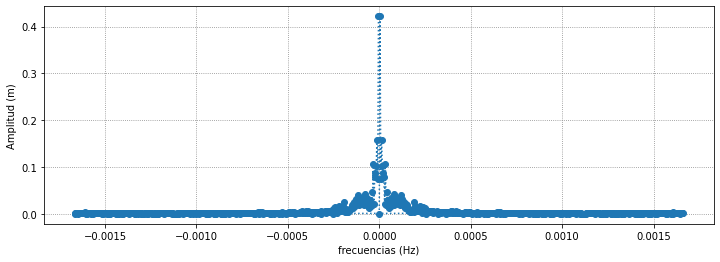

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(freq_mtv,xff_mtv*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='frecuencias (Hz)')
axs.grid(color='grey',ls=':',which='both')

In [ ]:
xff_mtv

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(freq_mtv[freq_mtv>=0],xff_mtv[freq_mtv>=0]*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='frecuencias (Hz)')
axs.grid(color='grey',ls=':',which='both')

In [ ]:
per_mtv=(1/freq_mtv[1::])/3600

In [ ]:
per_mtv=np.append(per_mtv,0)
per_mtv

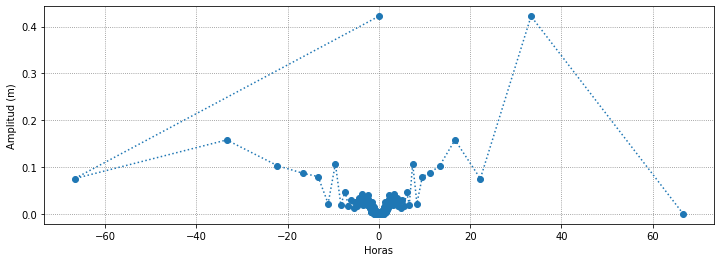

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(per_mtv,xff_mtv*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='Horas')
axs.grid(color='grey',ls=':',which='both')

In [ ]:
per_mtv[1:400]

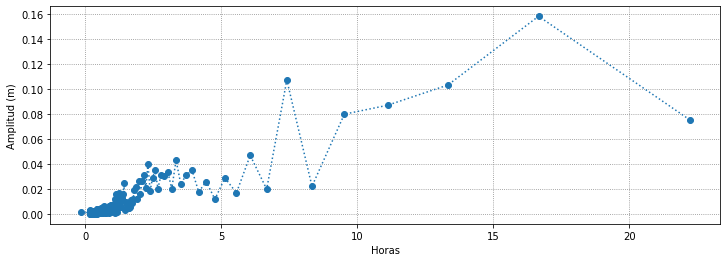

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(per_mtv[2:400],xff_mtv[2:400]*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='Horas')
axs.grid(color='grey',ls=':',which='both')

In [ ]:
resul_mtv=pd.DataFrame(columns=['T','A'])

In [ ]:
resul_mtv['T']=(1/freq_mtv[freq_mtv>=0])/3600
resul_mtv['A']=xff_mtv[freq_mtv>=0]*2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [ ]:
ordenados=resul_mtv.sort_values(by=['A'],ascending=False)

In [ ]:
ordenados['A']=ordenados['A'].round(3)

In [ ]:
ordenados[0:20]

T      A
1   66.666667  0.422
3   22.222222  0.158
8    8.333333  0.107
4   16.666667  0.103
5   13.333333  0.087
6   11.111111  0.080
2   33.333333  0.075
10   6.666667  0.047
19   3.508772  0.043
28   2.380952  0.040
16   4.166667  0.035
25   2.666667  0.035
21   3.174603  0.034
30   2.222222  0.031
17   3.921569  0.031
23   2.898551  0.031
22   3.030303  0.030
26   2.564103  0.029
12   5.555556  0.029
31   2.150538  0.026

# Montevideo Filtrado

In [ ]:
mtv_fil= pd.read_excel(r'/content/Libro1.xlsx')
mtv_fil

date  filtrados
0   2018-11-09 00:03:00   0.001761
1   2018-11-09 00:08:00  -0.008842
2   2018-11-09 00:13:00  -0.012030
3   2018-11-09 00:18:00  -0.003799
4   2018-11-09 00:23:00  -0.012136
..                  ...        ...
571 2018-11-10 23:38:00  -0.062842
572 2018-11-10 23:43:00  -0.075743
573 2018-11-10 23:48:00  -0.062118
574 2018-11-10 23:53:00  -0.030068
575 2018-11-10 23:58:00   0.002211

[576 rows x 2 columns]

In [ ]:
mtv_fil.set_index(mtv_fil.date,drop=True,inplace=True)
mtv_fil

date  filtrados
date                                              
2018-11-09 00:03:00 2018-11-09 00:03:00   0.001761
2018-11-09 00:08:00 2018-11-09 00:08:00  -0.008842
2018-11-09 00:13:00 2018-11-09 00:13:00  -0.012030
2018-11-09 00:18:00 2018-11-09 00:18:00  -0.003799
2018-11-09 00:23:00 2018-11-09 00:23:00  -0.012136
...                                 ...        ...
2018-11-10 23:38:00 2018-11-10 23:38:00  -0.062842
2018-11-10 23:43:00 2018-11-10 23:43:00  -0.075743
2018-11-10 23:48:00 2018-11-10 23:48:00  -0.062118
2018-11-10 23:53:00 2018-11-10 23:53:00  -0.030068
2018-11-10 23:58:00 2018-11-10 23:58:00   0.002211

[576 rows x 2 columns]

In [ ]:
mtv_fil_niveles= mtv_fil.filtrados
mtv_fil_niveles

date
2018-11-09 00:03:00    0.001761
2018-11-09 00:08:00   -0.008842
2018-11-09 00:13:00   -0.012030
2018-11-09 00:18:00   -0.003799
2018-11-09 00:23:00   -0.012136
                         ...   
2018-11-10 23:38:00   -0.062842
2018-11-10 23:43:00   -0.075743
2018-11-10 23:48:00   -0.062118
2018-11-10 23:53:00   -0.030068
2018-11-10 23:58:00    0.002211
Name: filtrados, Length: 576, dtype: float64

In [ ]:
mtv_fil.date

date
2018-11-09 00:03:00   2018-11-09 00:03:00
2018-11-09 00:08:00   2018-11-09 00:08:00
2018-11-09 00:13:00   2018-11-09 00:13:00
2018-11-09 00:18:00   2018-11-09 00:18:00
2018-11-09 00:23:00   2018-11-09 00:23:00
                              ...        
2018-11-10 23:38:00   2018-11-10 23:38:00
2018-11-10 23:43:00   2018-11-10 23:43:00
2018-11-10 23:48:00   2018-11-10 23:48:00
2018-11-10 23:53:00   2018-11-10 23:53:00
2018-11-10 23:58:00   2018-11-10 23:58:00
Name: date, Length: 576, dtype: datetime64[ns]

In [ ]:
mtv_fil.describe()

filtrados
count  576.000000
mean    -0.000493
std      0.093861
min     -0.416674
25%     -0.026097
50%     -0.000882
75%      0.022850
max      0.601656

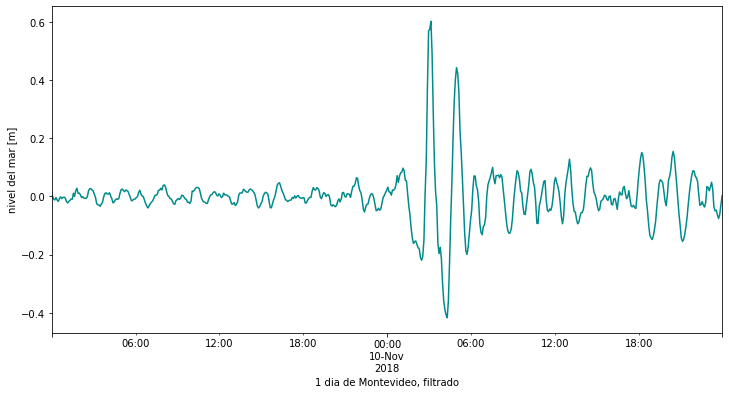

In [ ]:
mtv_fil_niveles.plot(xlabel= "1 dia de Montevideo, filtrado", ylabel= "nivel del mar [m]", figsize=(12,6), color="darkcyan")

In [ ]:
posicion=find_peaks(mtv_fil_niveles,prominence=0.1)[0] #--> Notar que la salida de la función findpeaks tiene 2 dimensiones 
#(en la primera tiene el índice de los picos y en la segunda las propiedades si es que se piden)
posicion

array([261, 301, 325, 347, 362, 378, 399, 411, 423, 432, 444, 462, 506,
       533, 550])

In [ ]:
altas= mtv_fil_niveles.iloc[posicion]
altas

date
2018-11-09 21:48:00    0.064032
2018-11-10 01:08:00    0.097144
2018-11-10 03:08:00    0.601656
2018-11-10 04:58:00    0.442368
2018-11-10 06:13:00    0.070421
2018-11-10 07:33:00    0.099765
2018-11-10 09:18:00    0.088486
2018-11-10 10:18:00    0.093412
2018-11-10 11:18:00    0.054099
2018-11-10 12:03:00    0.065126
2018-11-10 13:03:00    0.128120
2018-11-10 14:33:00    0.098235
2018-11-10 18:13:00    0.150743
2018-11-10 20:28:00    0.154594
2018-11-10 21:53:00    0.088252
Name: filtrados, dtype: float64

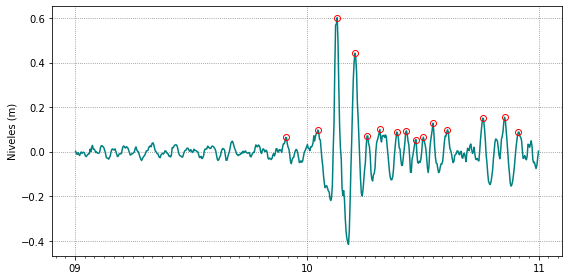

In [ ]:
fig, ax=plt.subplots(1,1,figsize=(8,4))
ax.plot(mtv_fil_niveles,'teal')
ax.plot(altas,'ro',fillstyle='none')
ax.set(ylabel="Niveles (m)")
ax.xaxis.set_minor_locator(mdates.HourLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax.grid(color='grey',linestyle=':')
plt.tight_layout()

In [ ]:
posicion_1=find_peaks(-mtv_fil_niveles, prominence=0.06)[0] #--> Notar que la salida de la función findpeaks tiene 2 dimensiones 
#(en la primera tiene el índice de los picos y en la segunda las propiedades si es que se piden)
posicion

array([261, 301, 325, 347, 362, 378, 399, 411, 423, 432, 444, 462, 506,
       533, 550])

In [ ]:
bajas= mtv_fil_niveles.iloc[posicion_1]
bajas

date
2018-11-09 06:53:00   -0.039475
2018-11-09 14:48:00   -0.039572
2018-11-09 20:18:00   -0.035284
2018-11-09 22:23:00   -0.053464
2018-11-10 02:28:00   -0.219053
2018-11-10 04:18:00   -0.416674
2018-11-10 05:43:00   -0.199156
2018-11-10 06:48:00   -0.131423
2018-11-10 08:43:00   -0.126664
2018-11-10 09:53:00   -0.062075
2018-11-10 10:48:00   -0.093074
2018-11-10 11:33:00   -0.051836
2018-11-10 12:33:00   -0.093738
2018-11-10 13:38:00   -0.093775
2018-11-10 15:08:00   -0.049076
2018-11-10 17:48:00   -0.041403
2018-11-10 18:58:00   -0.147655
2018-11-10 19:58:00   -0.031688
2018-11-10 21:08:00   -0.154529
2018-11-10 22:43:00   -0.036348
2018-11-10 23:43:00   -0.075743
Name: filtrados, dtype: float64

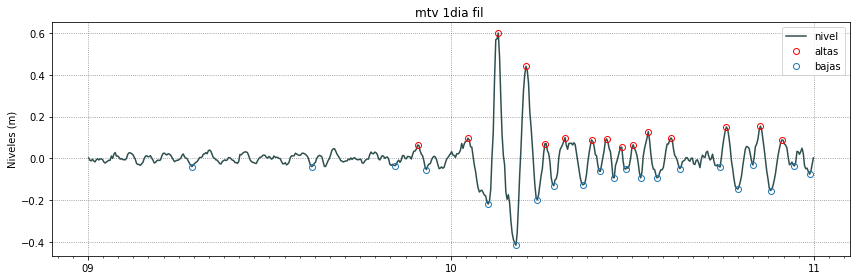

In [ ]:
fig, ax=plt.subplots(1,1,figsize=(12,4))
ax.plot(mtv_fil_niveles,'darkslategrey')
ax.plot(altas,'ro',fillstyle='none')
ax.plot(bajas,'o',fillstyle='none')
ax.set(ylabel="Niveles (m)",title='mtv 1dia fil ')
ax.xaxis.set_minor_locator(mdates.HourLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax.grid(color='grey',linestyle=':')
ax.legend(['nivel','altas','bajas'])
plt.tight_layout()

In [ ]:
mtv_fil.describe()

filtrados
count  576.000000
mean    -0.000493
std      0.093861
min     -0.416674
25%     -0.026097
50%     -0.000882
75%      0.022850
max      0.601656

In [ ]:
periodos=np.diff(posicion)
np.round(periodos*5/60,2)

array([3.33, 2.  , 1.83, 1.25, 1.33, 1.75, 1.  , 1.  , 0.75, 1.  , 1.5 ,
       3.67, 2.25, 1.42])

Paso info a un array

In [ ]:
x_mtv_fil=np.squeeze(mtv_fil_niveles-mtv_fil.mean().values)
np.info(x_mtv_fil)

One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object
supports both integer- and label-based indexing and provides a host of
methods for performing operations involving the index. Statistical
methods from ndarray have been overridden to automatically exclude
missing data (currently represented as NaN).

Operations between Series (+, -, /, *, **) align values based on their
associated index values-- they need not be the same length. The result
index will be the sorted union of the two indexes.

Parameters
----------
data : array-like, Iterable, dict, or scalar value
    Contains data stored in Series. If data is a dict, argument order is
    maintained.
index : array-like or Index (1d)
    Values must be hashable and have the same length as `data`.
    Non-unique index values are allowed. Will default to
    RangeIndex (0, 1, 2, ..., n) if not provided. If data is dict-like
    and index is None, then the key

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


Defino el espacio de frecuencias
frecuencia de muestreo fs
frecuencia de nysquist fn
ff: frecuencia minima visble

todo se divide por 60 asi los datos aparecen en horas

In [ ]:
fs_mtv=1/(5*5)
dur_mtv=mtv.size*5*5
ff_mtv=1/(dur_mdp-1)
fN_u=1/(2*60*60)
f_mdp=np.arange(0,fN_mdp,ff_mdp)

Todo eso mas facil aca

In [ ]:
freq_mtv_fil=np.fft.fftfreq(x_mtv_fil.size,d=5*60)
freq_mtv_fil

Transformada de fourier

In [ ]:
Y_mtv_fil=np.fft.fft(x_mtv_fil)

In [ ]:
xff_mtv_fil=(1/len(Y_mtv_fil))*np.abs(Y_mtv_fil)#Y_mdp.real

In [ ]:
freq_mtv_fil.size

576

In [ ]:
xff_mtv_fil.size

576

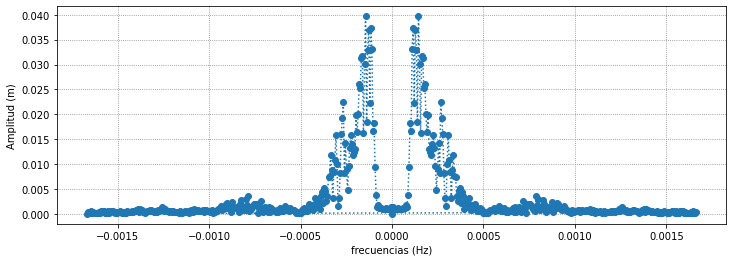

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(freq_mtv_fil,xff_mtv_fil*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='frecuencias (Hz)')
axs.grid(color='grey',ls=':',which='both')

In [ ]:
xff_mtv_fil

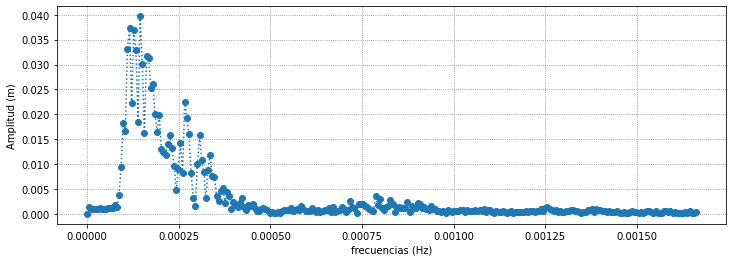

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(freq_mtv_fil[freq_mtv_fil>=0],xff_mtv_fil[freq_mtv_fil>=0]*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='frecuencias (Hz)')
axs.grid(color='grey',ls=':',which='both')

In [ ]:
per_mtv_fil=(1/freq_mtv_fil[1::])/3600

In [ ]:
per_mtv_fil=np.append(per_mtv_fil,0)
per_mtv_fil

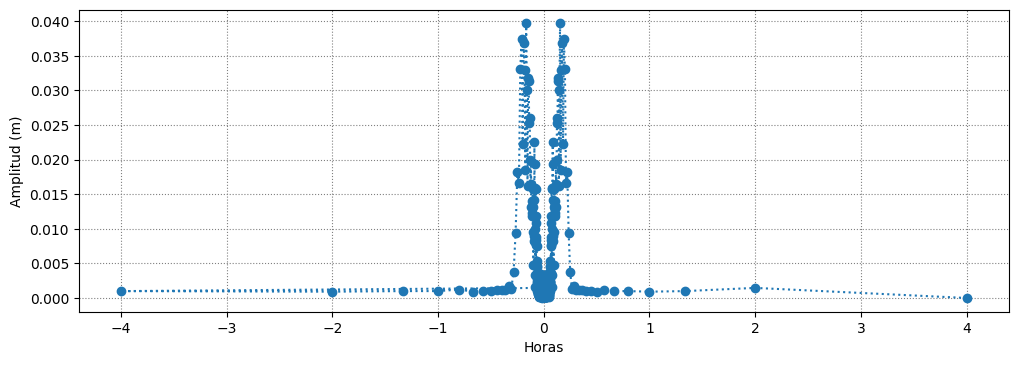

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(per_mtv_fil,xff_mtv_fil[::]*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='Horas')
axs.grid(color='grey',ls=':',which='both')

In [ ]:
per_mtv_fil[0:40]

NameError: ignored

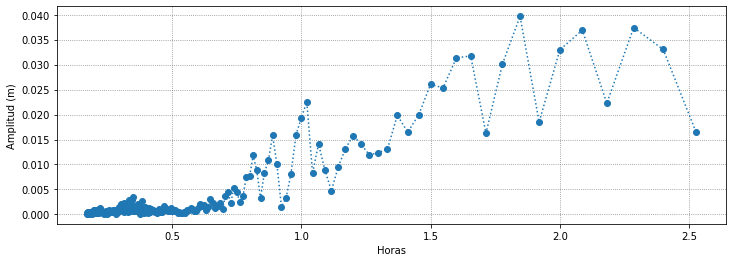

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(per_mtv_fil[18:280],xff_mtv_fil[18:280]*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='Horas')
axs.grid(color='grey',ls=':',which='both')

In [ ]:
resul_mtv_fil=pd.DataFrame(columns=['T','A'])

In [ ]:
resul_mtv_fil['T']=(1/freq_mtv_fil[freq_mtv_fil>=0])/3600
resul_mtv_fil['A']=xff_mtv_fil[freq_mtv_fil>=0]*2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [ ]:
ordenados=resul_mtv_fil.sort_values(by=['A'],ascending=False)

In [ ]:
ordenados['A']=ordenados['A'].round(3)

In [ ]:
ordenados[0:20]

T      A
25  1.920000  0.040
20  2.400000  0.037
22  2.181818  0.037
19  2.526316  0.033
23  2.086957  0.033
28  1.714286  0.032
29  1.655172  0.031
26  1.846154  0.030
31  1.548387  0.026
30  1.600000  0.025
46  1.043478  0.023
21  2.285714  0.022
32  1.500000  0.020
34  1.411765  0.020
47  1.021277  0.019
24  2.000000  0.019
17  2.823529  0.018
18  2.666667  0.017
33  1.454545  0.016
27  1.777778  0.016

# Islas Flores

In [ ]:
isf= pd.read_excel(r'/content/Isla_Flores_Nov_10_2018 (1).xlsx')
isf

date  NiveldelMar
0   2018-11-09 00:03:00        0.214
1   2018-11-09 00:19:00        0.237
2   2018-11-09 00:27:00        0.230
3   2018-11-09 00:29:00        0.233
4   2018-11-09 00:38:00        0.237
..                  ...          ...
787 2018-11-10 23:35:00        0.964
788 2018-11-10 23:36:00        0.964
789 2018-11-10 23:40:00        0.960
790 2018-11-10 23:41:00        0.960
791 2018-11-10 23:46:00        0.978

[792 rows x 2 columns]

In [ ]:
isf.set_index(isf.date,drop=True,inplace=True)
isf

date  NiveldelMar
date                                                
2018-11-09 00:03:00 2018-11-09 00:03:00        0.214
2018-11-09 00:19:00 2018-11-09 00:19:00        0.237
2018-11-09 00:27:00 2018-11-09 00:27:00        0.230
2018-11-09 00:29:00 2018-11-09 00:29:00        0.233
2018-11-09 00:38:00 2018-11-09 00:38:00        0.237
...                                 ...          ...
2018-11-10 23:35:00 2018-11-10 23:35:00        0.964
2018-11-10 23:36:00 2018-11-10 23:36:00        0.964
2018-11-10 23:40:00 2018-11-10 23:40:00        0.960
2018-11-10 23:41:00 2018-11-10 23:41:00        0.960
2018-11-10 23:46:00 2018-11-10 23:46:00        0.978

[792 rows x 2 columns]

In [ ]:
isf_niveles= isf.NiveldelMar
isf_niveles

date
2018-11-09 00:03:00    0.214
2018-11-09 00:19:00    0.237
2018-11-09 00:27:00    0.230
2018-11-09 00:29:00    0.233
2018-11-09 00:38:00    0.237
                       ...  
2018-11-10 23:35:00    0.964
2018-11-10 23:36:00    0.964
2018-11-10 23:40:00    0.960
2018-11-10 23:41:00    0.960
2018-11-10 23:46:00    0.978
Name: NiveldelMar, Length: 792, dtype: float64

In [ ]:
isf.describe()

NiveldelMar
count   792.000000
mean      0.850582
std       0.340944
min       0.141000
25%       0.733500
50%       0.869000
75%       1.049000
max       1.789000

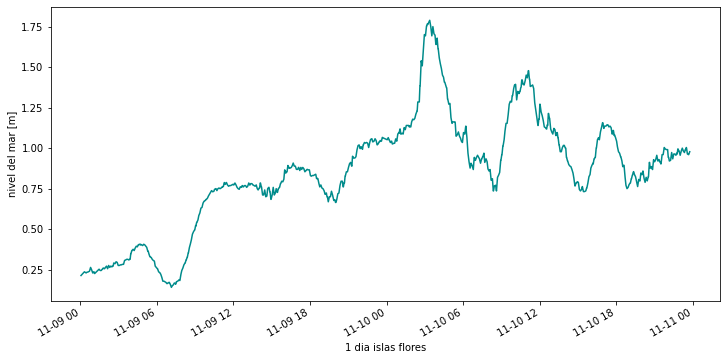

In [ ]:
isf_niveles.plot(xlabel= "1 dia islas flores", ylabel= "nivel del mar [m]", figsize=(12,6), color="darkcyan")

In [ ]:
posicion=find_peaks(isf_niveles,prominence=0.15)[0] #--> Notar que la salida de la función findpeaks tiene 2 dimensiones 
#(en la primera tiene el índice de los picos y en la segunda las propiedades si es que se piden)
posicion

array([ 66,  69,  73, 271, 448, 576, 674])

In [ ]:
altas= isf_niveles.iloc[posicion]
altas

date
2018-11-09 04:37:00    0.407
2018-11-09 04:43:00    0.407
2018-11-09 04:58:00    0.407
2018-11-09 16:41:00    0.908
2018-11-10 03:23:00    1.789
2018-11-10 11:07:00    1.478
2018-11-10 16:56:00    1.157
Name: NiveldelMar, dtype: float64

In [ ]:
periodos=np.diff(posicion)
np.round(periodos*5/60,2)

array([ 0.25,  0.33, 16.5 , 14.75, 10.67,  8.17])

In [ ]:
np.round(periodos*5/60,2).mean()

8.445

In [ ]:
periodos.mean()

101.33333333333333

Paso info a un array

In [ ]:
x_isf=np.squeeze(isf_niveles-isf_niveles.mean())
np.info(x_isf)

One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object
supports both integer- and label-based indexing and provides a host of
methods for performing operations involving the index. Statistical
methods from ndarray have been overridden to automatically exclude
missing data (currently represented as NaN).

Operations between Series (+, -, /, *, **) align values based on their
associated index values-- they need not be the same length. The result
index will be the sorted union of the two indexes.

Parameters
----------
data : array-like, Iterable, dict, or scalar value
    Contains data stored in Series. If data is a dict, argument order is
    maintained.
index : array-like or Index (1d)
    Values must be hashable and have the same length as `data`.
    Non-unique index values are allowed. Will default to
    RangeIndex (0, 1, 2, ..., n) if not provided. If data is dict-like
    and index is None, then the key

Defino el espacio de frecuencias
frecuencia de muestreo fs
frecuencia de nysquist fn
ff: frecuencia minima visble

todo se divide por 60 asi los datos aparecen en horas

In [ ]:
fs_mtv=1/(5*5)
dur_mtv=mtv.size*5*5
ff_mtv=1/(dur_mdp-1)
fN_u=1/(2*60*60)
f_mdp=np.arange(0,fN_mdp,ff_mdp)

Todo eso mas facil aca

In [ ]:
freq_isf=np.fft.fftfreq(x_isf.size,d=5*60)
freq_isf

Transformada de fourier

In [ ]:
Y_isf=np.fft.fft(x_isf)

In [ ]:
xff_isf=(1/len(Y_isf))*np.abs(Y_isf)#Y_mdp.real

In [ ]:
freq_isf.size

792

In [ ]:
xff_isf.size

792

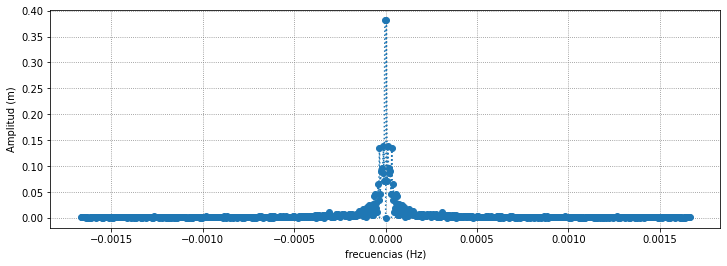

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(freq_isf,xff_isf*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='frecuencias (Hz)')
axs.grid(color='grey',ls=':',which='both')

In [ ]:
xff_isf

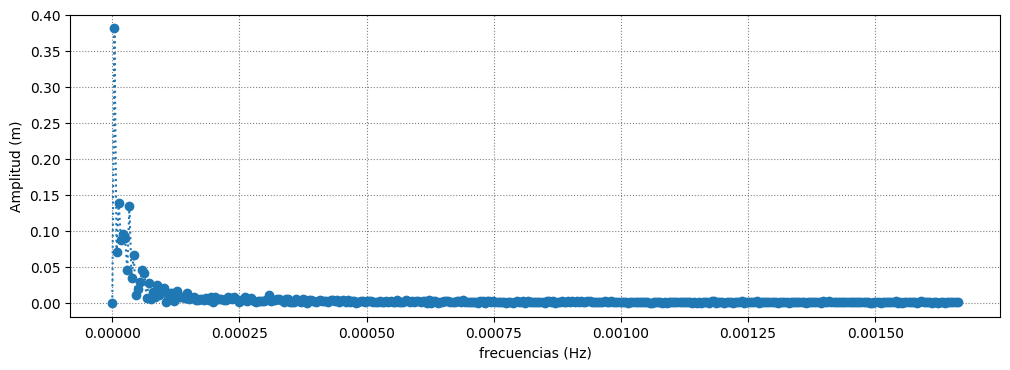

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(freq_isf[freq_isf>=0],xff_isf[freq_isf>=0]*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='frecuencias (Hz)')
axs.grid(color='grey',ls=':',which='both')

In [ ]:
per_isf=(1/freq_isf[1::])/3600

In [ ]:
per_isf=np.append(per_isf,0)
per_isf

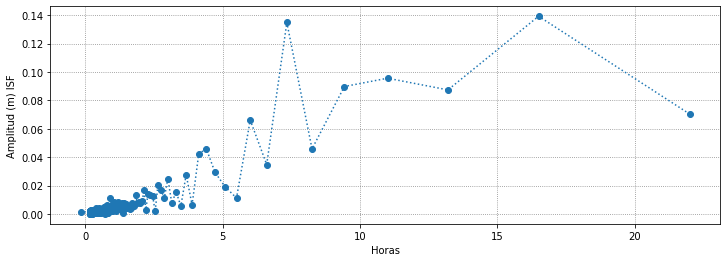

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(per_isf[2:396],xff_isf[2:396]*2,':o')
axs.set(ylabel='Amplitud (m) ISF',xlabel='Horas')
axs.grid(color='grey',ls=':',which='both')

In [ ]:
per_isf[0:40]

array([66.        , 33.        , 22.        , 16.5       , 13.2       ,
       11.        ,  9.42857143,  8.25      ,  7.33333333,  6.6       ,
        6.        ,  5.5       ,  5.07692308,  4.71428571,  4.4       ,
        4.125     ,  3.88235294,  3.66666667,  3.47368421,  3.3       ,
        3.14285714,  3.        ,  2.86956522,  2.75      ,  2.64      ,
        2.53846154,  2.44444444,  2.35714286,  2.27586207,  2.2       ,
        2.12903226,  2.0625    ,  2.        ,  1.94117647,  1.88571429,
        1.83333333,  1.78378378,  1.73684211,  1.69230769,  1.65      ])

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(per_isf[0:40],xff_isf[0:40]*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='Horas')
axs.grid(color='grey',ls=':',which='both')

In [ ]:
resul_isf=pd.DataFrame(columns=['T','A'])

In [ ]:
resul_isf['T']=(1/freq_isf[freq_isf>=0])/3600
resul_isf['A']=xff_isf[freq_isf>=0]*2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [ ]:
ordenados=resul_isf.sort_values(by=['A'],ascending=False)

In [ ]:
ordenados['A']=ordenados['A'].round(3)

In [ ]:
ordenados[0:20]

T      A
1   66.000000  0.381
3   22.000000  0.139
8    8.250000  0.135
5   13.200000  0.096
6   11.000000  0.090
4   16.500000  0.087
2   33.000000  0.070
10   6.600000  0.066
14   4.714286  0.046
7    9.428571  0.046
15   4.400000  0.042
9    7.333333  0.035
13   5.076923  0.030
17   3.882353  0.028
21   3.142857  0.025
24   2.750000  0.021
12   5.500000  0.019
23   2.869565  0.017
30   2.200000  0.017
19   3.473684  0.016

# Islas flores filtrado

In [ ]:
isf_fil= pd.read_excel(r'/content/isf fil.xlsx')
isf_fil

date  filtrados
0   2018-11-09 00:03:00   0.004822
1   2018-11-09 00:08:00   0.008799
2   2018-11-09 00:13:00   0.012537
3   2018-11-09 00:18:00   0.016101
4   2018-11-09 00:23:00   0.010305
..                  ...        ...
571 2018-11-10 23:38:00   0.002221
572 2018-11-10 23:43:00   0.010224
573 2018-11-10 23:48:00   0.021855
574 2018-11-10 23:53:00   0.019645
575 2018-11-10 23:58:00   0.017321

[576 rows x 2 columns]

In [ ]:
isf_fil.set_index(isf_fil.date,drop=True,inplace=True)
isf_fil

date  filtrados
date                                              
2018-11-09 00:03:00 2018-11-09 00:03:00   0.004822
2018-11-09 00:08:00 2018-11-09 00:08:00   0.008799
2018-11-09 00:13:00 2018-11-09 00:13:00   0.012537
2018-11-09 00:18:00 2018-11-09 00:18:00   0.016101
2018-11-09 00:23:00 2018-11-09 00:23:00   0.010305
...                                 ...        ...
2018-11-10 23:38:00 2018-11-10 23:38:00   0.002221
2018-11-10 23:43:00 2018-11-10 23:43:00   0.010224
2018-11-10 23:48:00 2018-11-10 23:48:00   0.021855
2018-11-10 23:53:00 2018-11-10 23:53:00   0.019645
2018-11-10 23:58:00 2018-11-10 23:58:00   0.017321

[576 rows x 2 columns]

In [ ]:
isf_fil_niveles= isf_fil.filtrados
isf_fil_niveles

date
2018-11-09 00:03:00    0.004822
2018-11-09 00:08:00    0.008799
2018-11-09 00:13:00    0.012537
2018-11-09 00:18:00    0.016101
2018-11-09 00:23:00    0.010305
                         ...   
2018-11-10 23:38:00    0.002221
2018-11-10 23:43:00    0.010224
2018-11-10 23:48:00    0.021855
2018-11-10 23:53:00    0.019645
2018-11-10 23:58:00    0.017321
Name: filtrados, Length: 576, dtype: float64

In [ ]:
isf_fil.describe()

filtrados
count  576.000000
mean     0.000198
std      0.033869
min     -0.144798
25%     -0.014806
50%      0.001247
75%      0.016463
max      0.133625

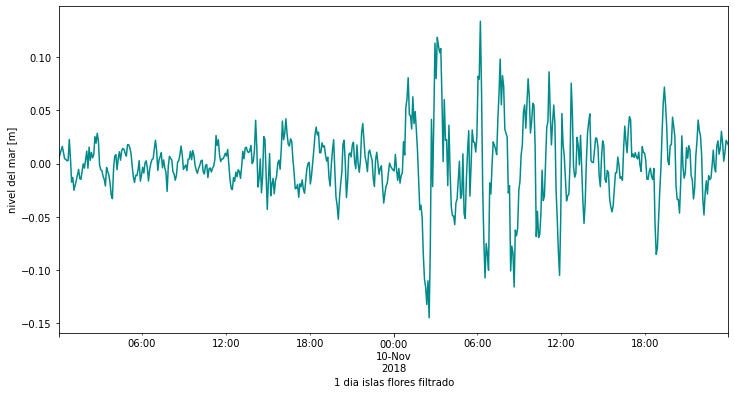

In [ ]:
isf_fil_niveles.plot(xlabel= "1 dia islas flores filtrado", ylabel= "nivel del mar [m]", figsize=(12,6), color="darkcyan")

Paso info a un array

In [ ]:
x_isf_fil=np.squeeze(isf_fil_niveles-isf_fil.mean().values)
np.info(x_isf_fil)

Defino el espacio de frecuencias
frecuencia de muestreo fs
frecuencia de nysquist fn
ff: frecuencia minima visble

todo se divide por 60 asi los datos aparecen en horas

In [ ]:
fs_isf=1/(5*5)
dur_isf=isf.size*5*5
ff_isf=1/(dur_mdp-1)
fN_u=1/(2*60*60)
f_mdp=np.arange(0,fN_mdp,ff_mdp)

Todo eso mas facil aca

In [ ]:
freq_isf_fil=np.fft.fftfreq(x_isf_fil.size,d=5*60)


Transformada de fourier

In [ ]:
Y_isf_fil=np.fft.fft(x_isf_fil)

In [ ]:
xff_isf_fil=(1/len(Y_isf_fil))*np.abs(Y_isf_fil)#Y_mdp.real

In [ ]:
freq_isf_fil.size

576

In [ ]:
xff_isf_fil.size

576

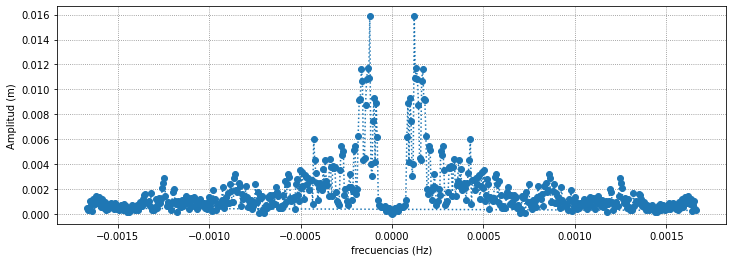

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(freq_isf_fil,xff_isf_fil*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='frecuencias (Hz)')
axs.grid(color='grey',ls=':',which='both')

In [ ]:
xff_isf_fil

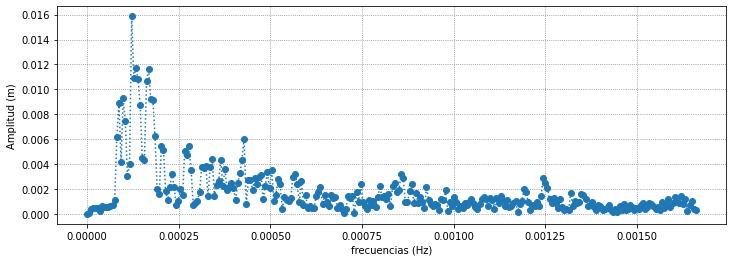

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(freq_isf_fil[freq_isf_fil>=0],xff_isf_fil[freq_isf_fil>=0]*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='frecuencias (Hz)')
axs.grid(color='grey',ls=':',which='both')

In [ ]:
per_isf_fil=(1/freq_isf_fil[1::])/3600

In [ ]:
per_isf_fil=np.append(per_isf_fil,0)
per_isf_fil

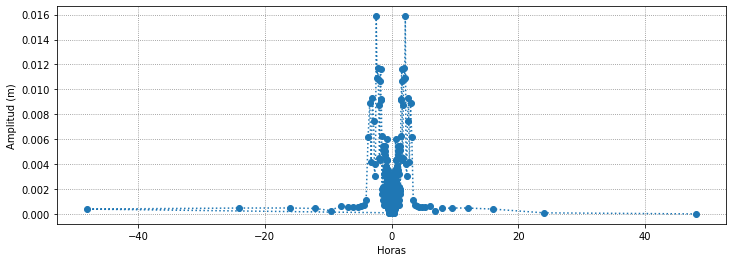

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(per_isf_fil,xff_isf_fil[::]*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='Horas')
axs.grid(color='grey',ls=':',which='both')

In [ ]:
per_isf_fil[0:40]

NameError: ignored

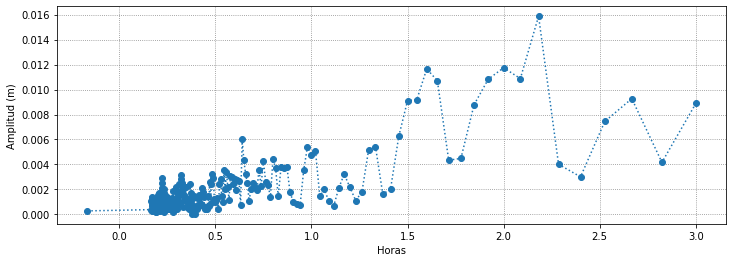

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(per_isf_fil[15:288],xff_isf_fil[15:288]*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='Horas')
axs.grid(color='grey',ls=':',which='both')

In [ ]:
resul_isf_fil=pd.DataFrame(columns=['T','A'])

In [ ]:
resul_isf_fil['T']=(1/freq_isf_fil[freq_isf_fil>=0])/3600
resul_isf_fil['A']=xff_isf_fil[freq_isf_fil>=0]*2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [ ]:
ordenados=resul_isf_fil.sort_values(by=['A'],ascending=False)

In [ ]:
ordenados['A']=ordenados['A'].round(3)

In [ ]:
ordenados[0:20]

T      A
21  2.285714  0.016
23  2.086957  0.012
29  1.655172  0.012
22  2.181818  0.011
24  2.000000  0.011
28  1.714286  0.011
17  2.823529  0.009
30  1.600000  0.009
31  1.548387  0.009
15  3.200000  0.009
25  1.920000  0.009
18  2.666667  0.007
32  1.500000  0.006
14  3.428571  0.006
74  0.648649  0.006
48  1.000000  0.005
35  1.371429  0.005
36  1.333333  0.005
46  1.043478  0.005
47  1.021277  0.005